In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import date
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = r'C:\Users\drraa\OneDrive\Desktop\CVIP internship\Internship\phase 1 Normal task\Hackathon_Working_Data.csv'
data = pd.read_csv(file_path)


In [4]:
data.head

<bound method NDFrame.head of       MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP                     SGRP  \
0            BUTTER MARGR  (4/94)                   BUTTER   
1         CONFECTIONERY - ECLAIRS  CONFEC

In [5]:
data.shape

(26985, 14)

In [6]:
data.isnull()

MONTH  STORECODE    DAY  BILL_ID  BILL_AMT    QTY  VALUE  PRICE    GRP  \
0      False      False  False    False     False  False  False  False  False   
1      False      False  False    False     False  False  False  False  False   
2      False      False  False    False     False  False  False  False  False   
3      False      False  False    False     False  False  False  False  False   
4      False      False  False    False     False  False  False  False  False   
...      ...        ...    ...      ...       ...    ...    ...    ...    ...   
26980  False      False  False    False     False  False  False  False  False   
26981  False      False  False    False     False  False  False  False  False   
26982  False      False  False    False     False  False  False  False  False   
26983  False      False  False    False     False  False  False  False  False   
26984  False      False  False    False     False  False  False  False  False   

        SGRP  SSGRP    CMP   MBRD    BRD  
0      False  False  False  False  False  
1      False  False  False  False  False  
2      False  False  False  False  False  
3      False  False  False  False  False  
4      False  False  False  False  False  
...      ...    ...    ...    ...    ...  
26980  False  False  False  False  False  
26981  False  False  False  False  False  
26982  False  False  False  False  False  
26983  False  False  False  False  False  
26984  False  False  False  False  False  

[26985 rows x 14 columns]

In [7]:
data.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [8]:
data.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [10]:
data.describe().T

count        mean         std  min   25%    50%    75%      max
DAY       26985.0   15.167019    8.956057  1.0   7.0   14.0   23.0     31.0
BILL_AMT  26985.0  278.754206  541.398504  0.0  40.0  111.0  280.0   7292.0
QTY       26985.0    4.105021   95.666947  0.5   1.0    1.0    2.0  12000.0
VALUE     26985.0   67.808551  118.005978  0.0  10.0   30.0   80.0   3150.0
PRICE     26985.0   52.812982   84.987730  0.0  10.0   22.0   64.0   3150.0

In [11]:
data.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64

In [12]:
data[data.duplicated()]

MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
516      M1        N1    8    T840     105.0  1.0   15.0   15.0   
670      M1        N1    9    T987     105.0  1.0   10.0   10.0   
1119     M1        N1   12   T1376     130.0  1.0    5.0    5.0   
2032     M1        N1   26   T3026      40.0  1.0   10.0   10.0   
2298     M1        N1   29   T3372     350.0  1.0  160.0  160.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26516    M3       N10    2   T4962      50.0  1.0   10.0   10.0   
26615    M3       N10    4   T5163     915.0  2.0  280.0  140.0   
26616    M3       N10    4   T5163     915.0  2.0  280.0  140.0   
26718    M3       N10   11   T5389      65.0  1.0   10.0   10.0   
26802    M3       N10   17   T5626     570.0  2.0  280.0  140.0   

                              GRP              SGRP             SSGRP  \
516             BREAKFAST CEREALS       HOT CEREALS              OATS   
670    BISCUITS - CORE & NON CORE  NON-SALT CRACKER  NON-SALT CRACKER   
1119   CONFECTIONERY - TOFFEE/HBC           TOFFEES           TOFFEES   
2032          VERMICELLI & NOODLE   INSTANT NOODLES   INSTANT NOODLES   
2298                    CHOCOLATE           MOULDED           MOULDED   
...                           ...               ...               ...   
26516  BISCUITS - CORE & NON CORE      SALT CRACKER      SALT CRACKER   
26615                PACKAGED TEA        MAIN PACKS        MAIN PACKS   
26616                PACKAGED TEA        MAIN PACKS        MAIN PACKS   
26718  BISCUITS - CORE & NON CORE      SALT CRACKER      SALT CRACKER   
26802                PACKAGED TEA        MAIN PACKS        MAIN PACKS   

                          CMP                MBRD                    BRD  
516             PEPSICO INDIA              QUAKER            QUAKER OATS  
670               PARLE PRODS    PARLE KRACK JACK       PARLE KRACK JACK  
1119       PERFETTI VAN MELLE         CHUPA CHUPS  CHUPA CHUPS SOUR BELT  
2032            CAPITAL FOODS      CHING'S SECRET         CHING'S SECRET  
2298   MONDELEZ INTERNATIONAL  CADBURY DAIRY MILK        DAIRY MILK SILK  
...                       ...                 ...                    ...  
26516             PARLE PRODS              MONACO                 MONACO  
26615     GIRNAR FOOD & BEVER              GIRNAR                 GIRNAR  
26616     GIRNAR FOOD & BEVER              GIRNAR                 GIRNAR  
26718             PARLE PRODS              MONACO                 MONACO  
26802     GIRNAR FOOD & BEVER              GIRNAR                 GIRNAR  

[90 rows x 14 columns]

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data[data.duplicated()]

Empty DataFrame
Columns: [MONTH, STORECODE, DAY, BILL_ID, BILL_AMT, QTY, VALUE, PRICE, GRP, SGRP, SSGRP, CMP, MBRD, BRD]
Index: []

 
 
 
 
 
 
 
 # sales by individual customer

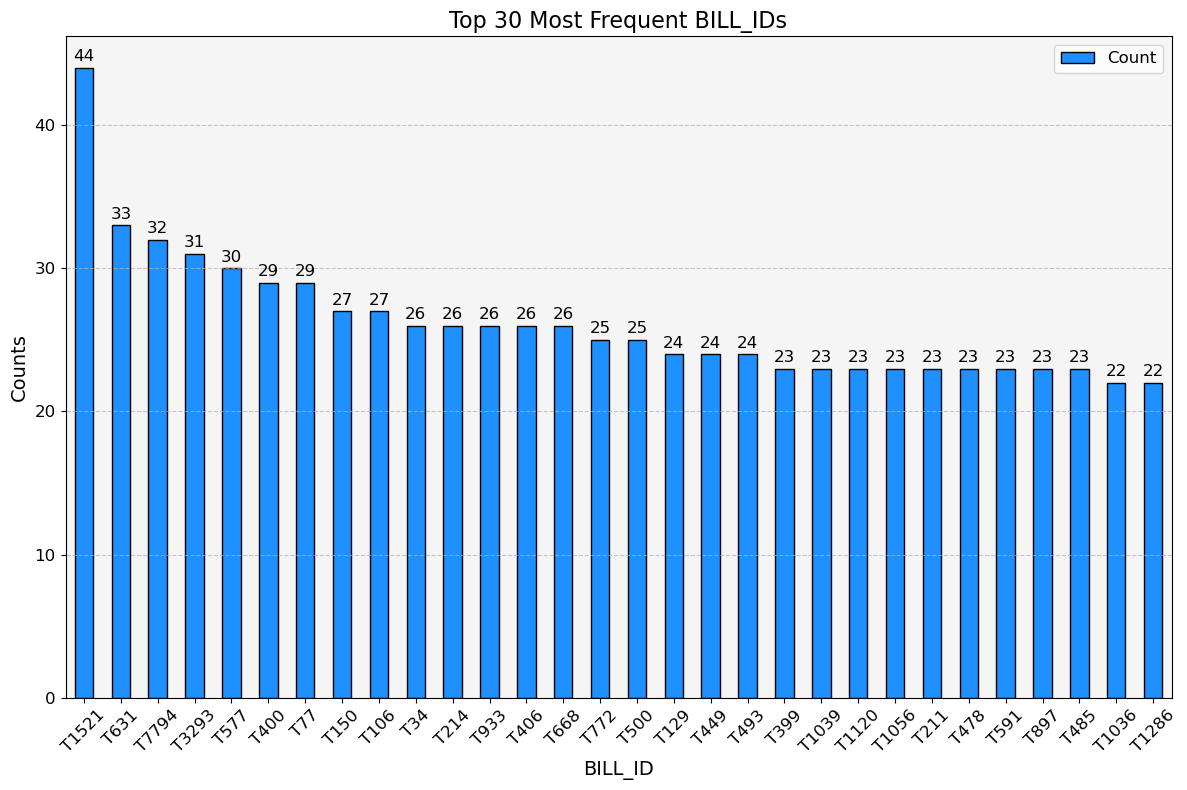

In [15]:
# Get the top 30 most frequent BILL_ID values


top_30_bill_ids = data['BILL_ID'].value_counts().head(30)

plt.figure(figsize=(12, 8))
bars = top_30_bill_ids.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.xlabel('BILL_ID', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top 30 Most Frequent BILL_IDs', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', size=12, xytext=(0, 8), 
                 textcoords='offset points')


plt.gca().set_facecolor('whitesmoke')
plt.legend(['Count'], fontsize=12)
plt.tight_layout()
plt.show()




# Sales per Day

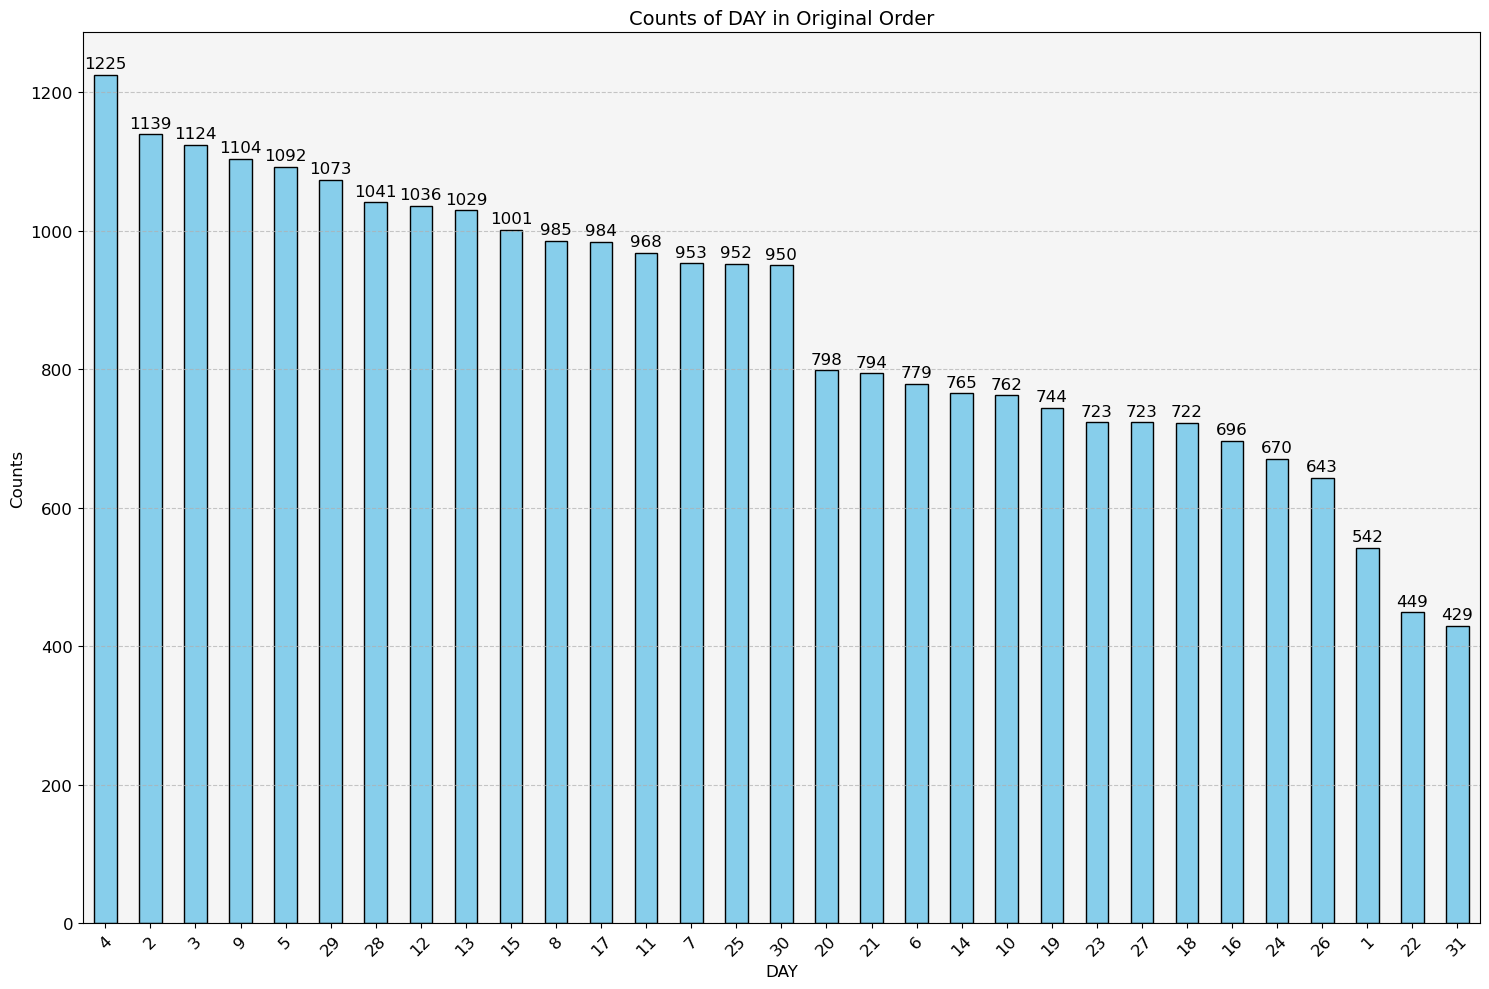

In [16]:
# Plotting value counts in the order of their appearance in the data


value_counts = data['DAY'].value_counts()
plt.figure(figsize=(15, 10))
bars = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('DAY', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Counts of DAY in Original Order', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', size=12, xytext=(0, 8), 
                 textcoords='offset points')
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

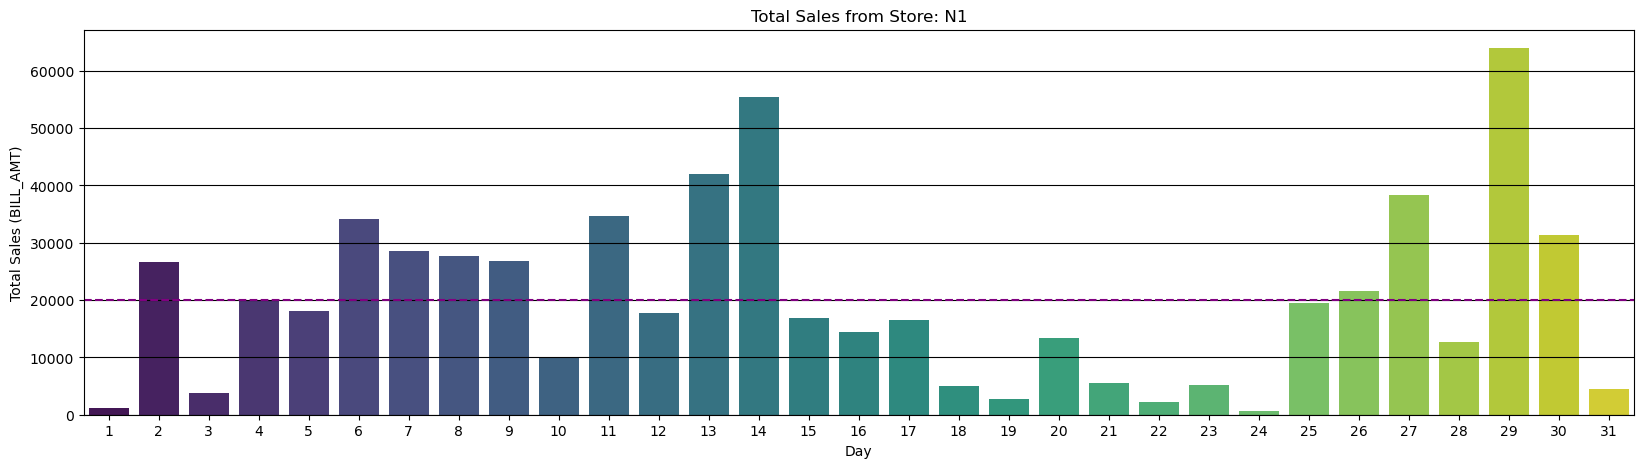

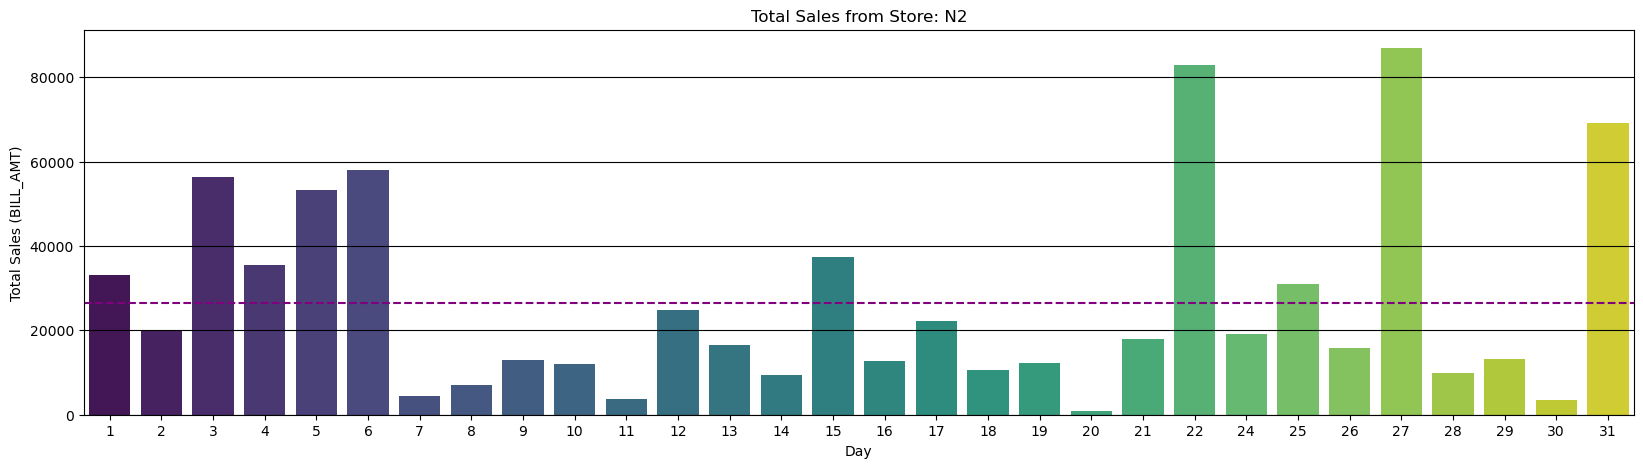

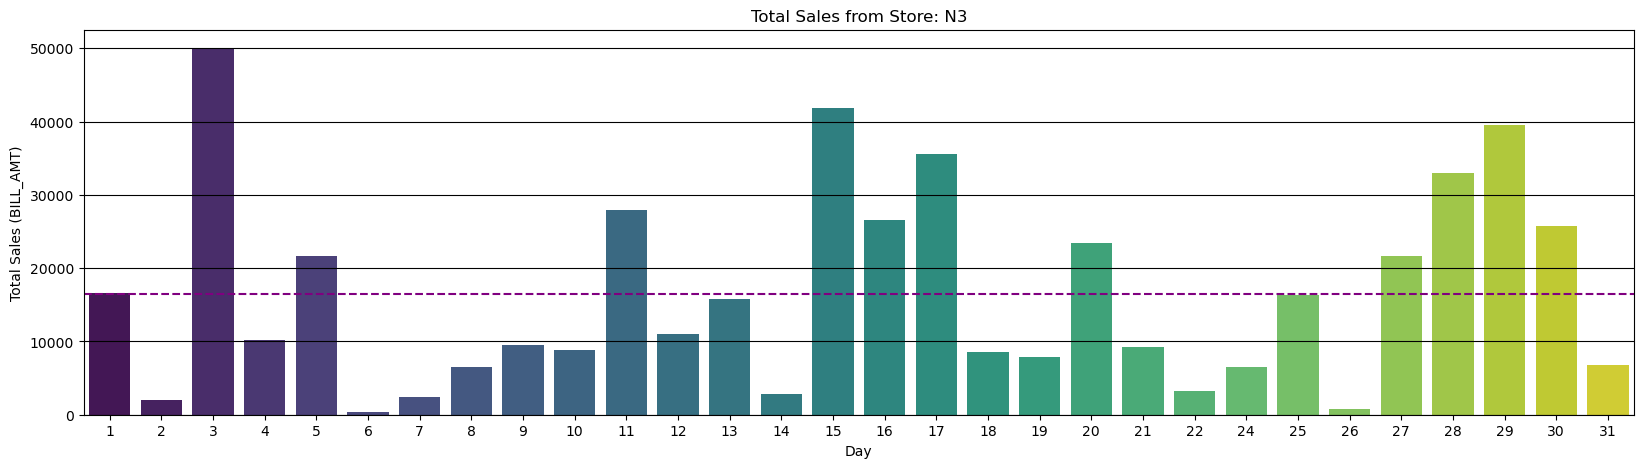

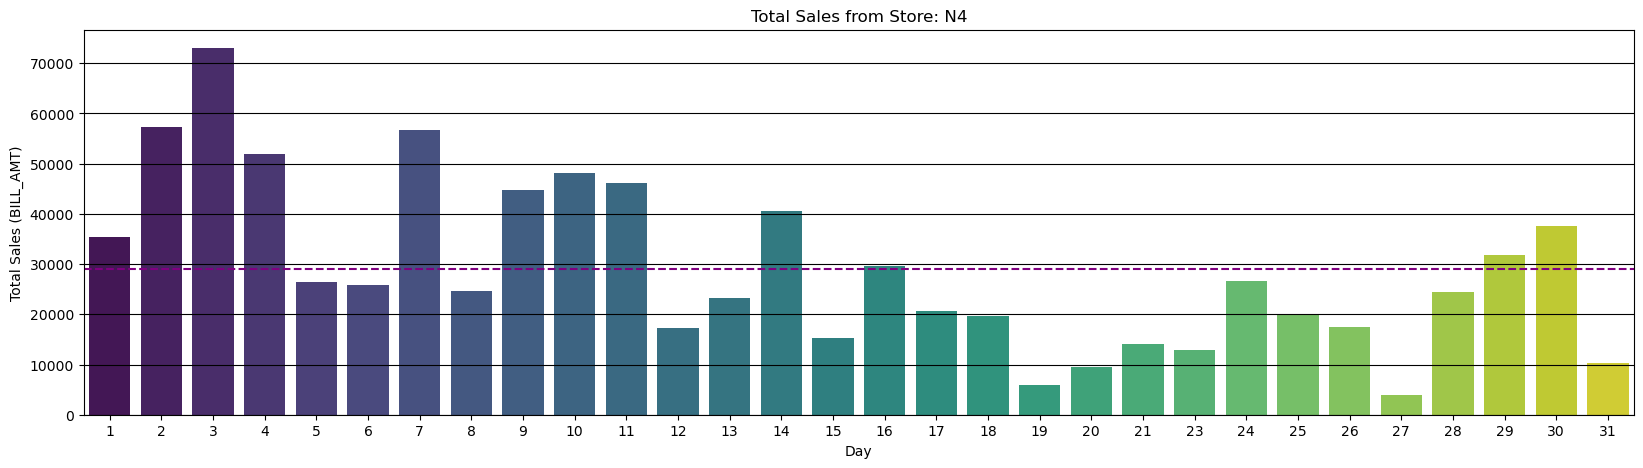

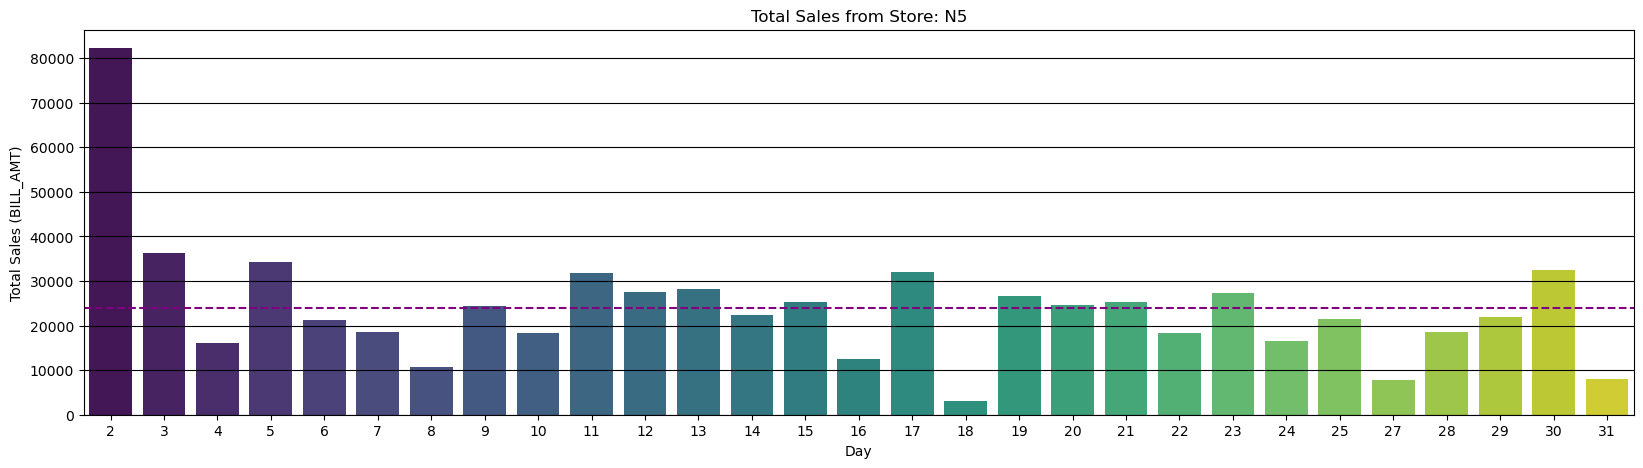

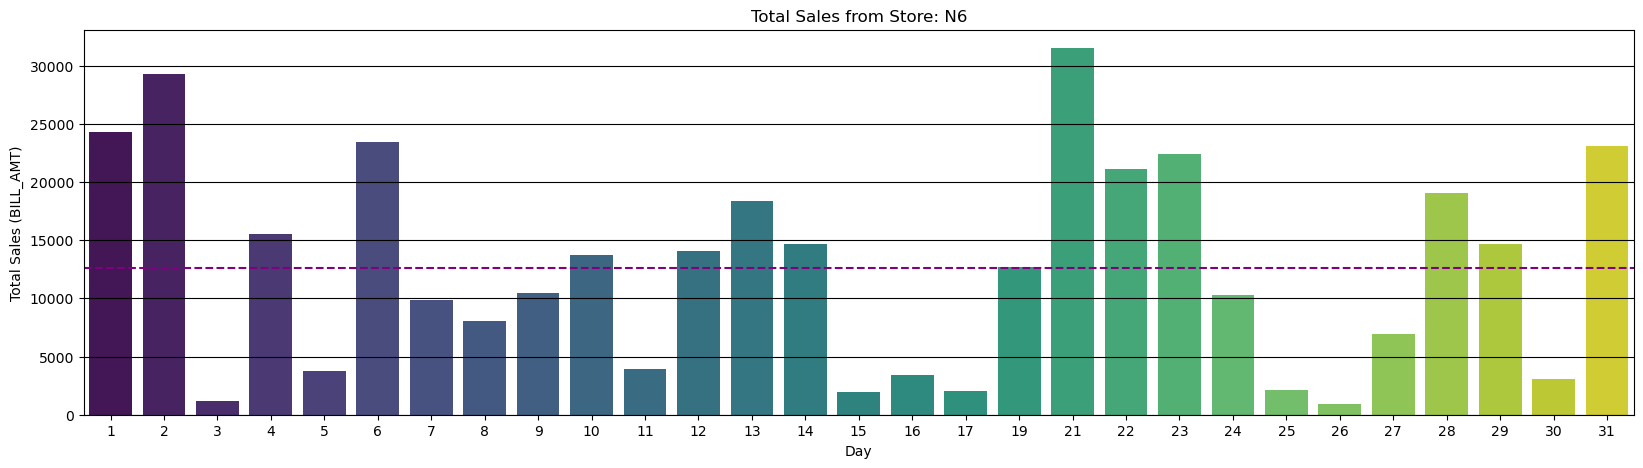

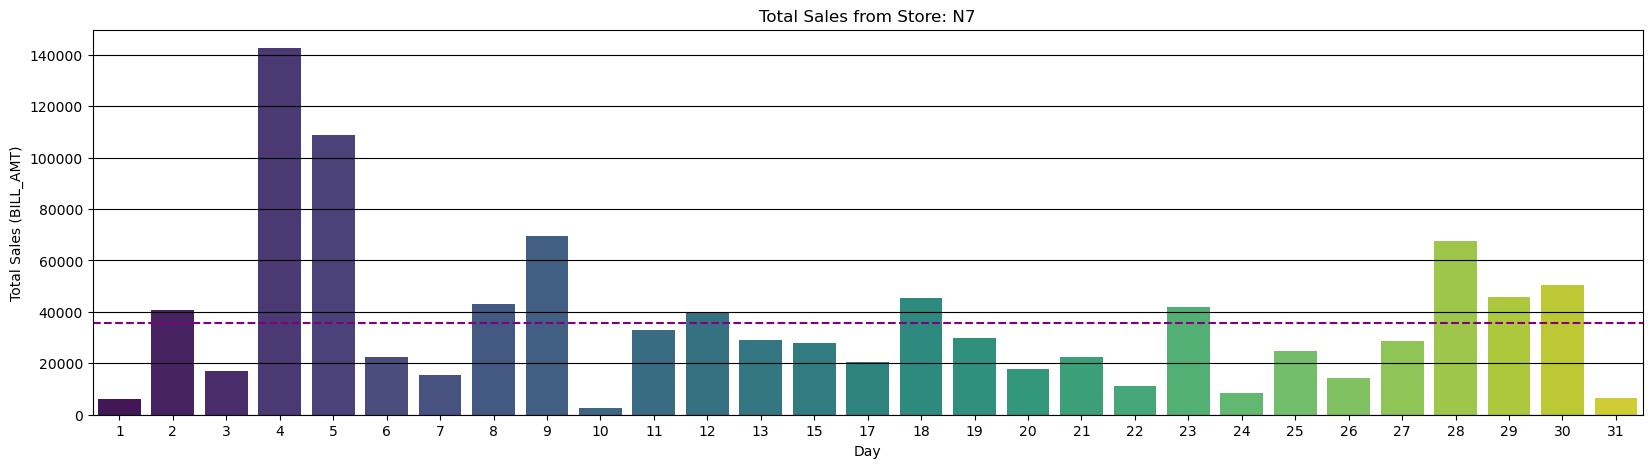

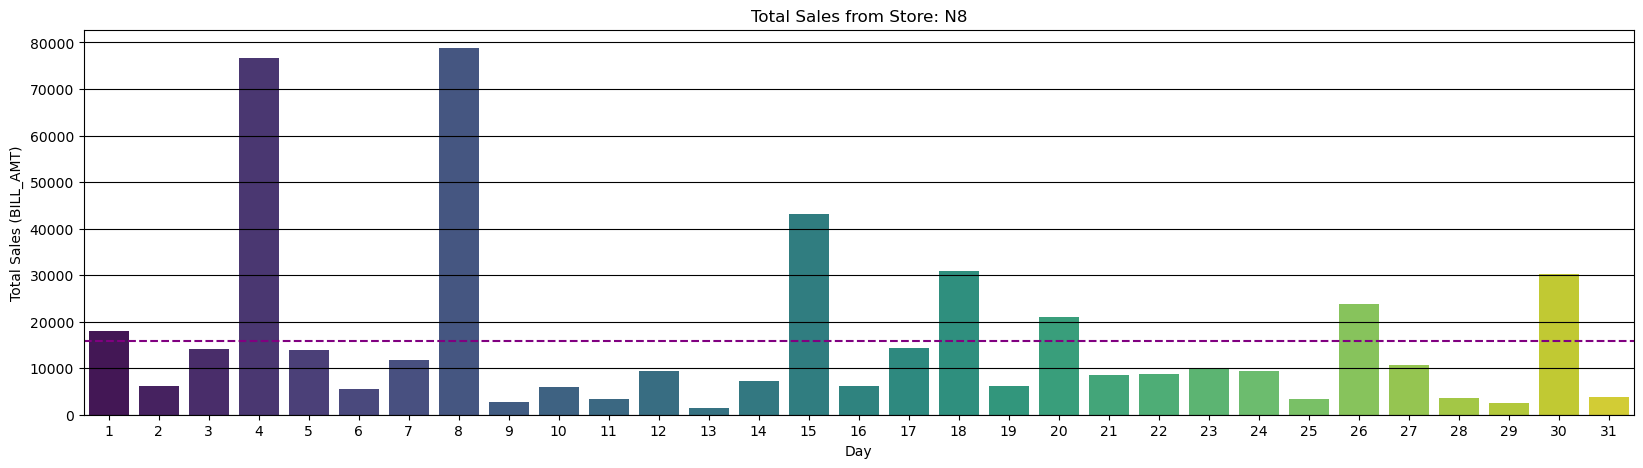

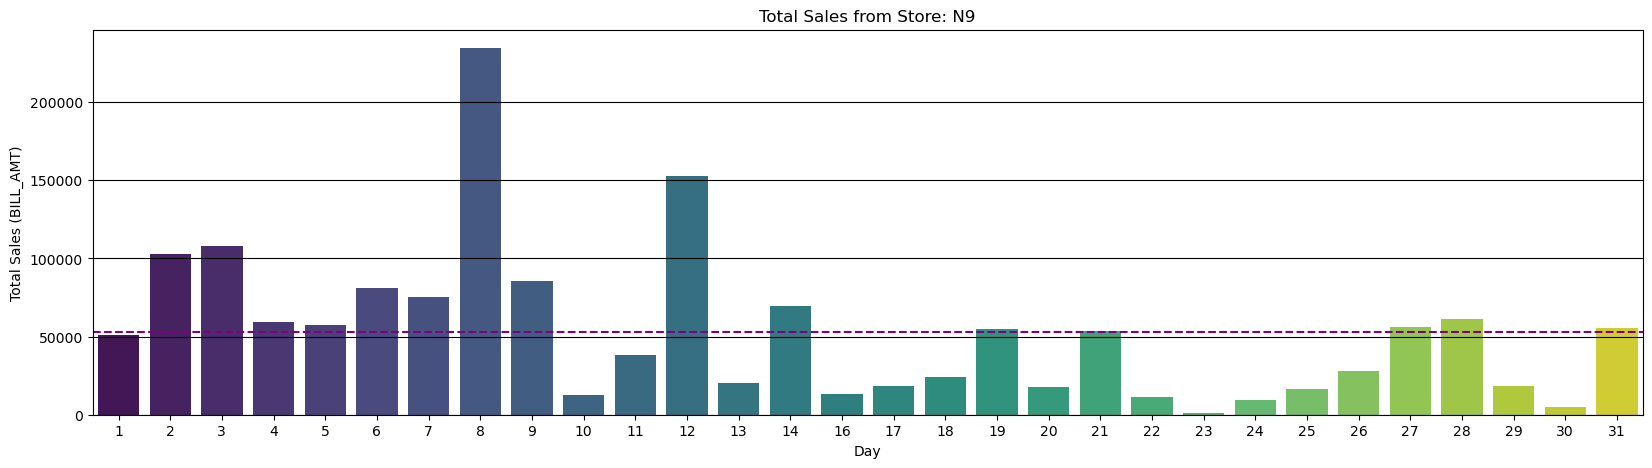

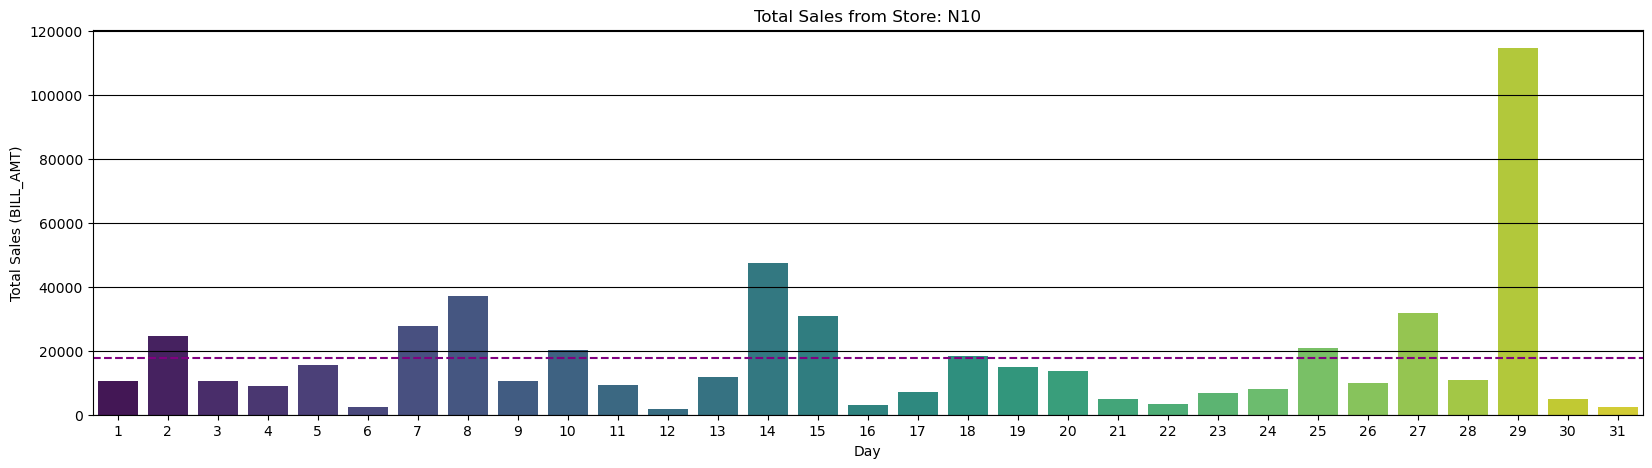

In [17]:

# Plot Total Sales by Day for Each Store


for store_code in data.STORECODE.unique():
    store_data = data[data.STORECODE == store_code].groupby("DAY").sum()
    plt.figure(figsize=(20, 5))
    sns.barplot(x=store_data.index, y=store_data["BILL_AMT"], palette="viridis")
    plt.axhline(store_data["BILL_AMT"].mean(), color='purple', linestyle='--')
    plt.title(f"Total Sales from Store: {store_code}")
    plt.xlabel("Day")
    plt.ylabel("Total Sales (BILL_AMT)")
    plt.grid(axis='y', color='black')
    plt.show()
    

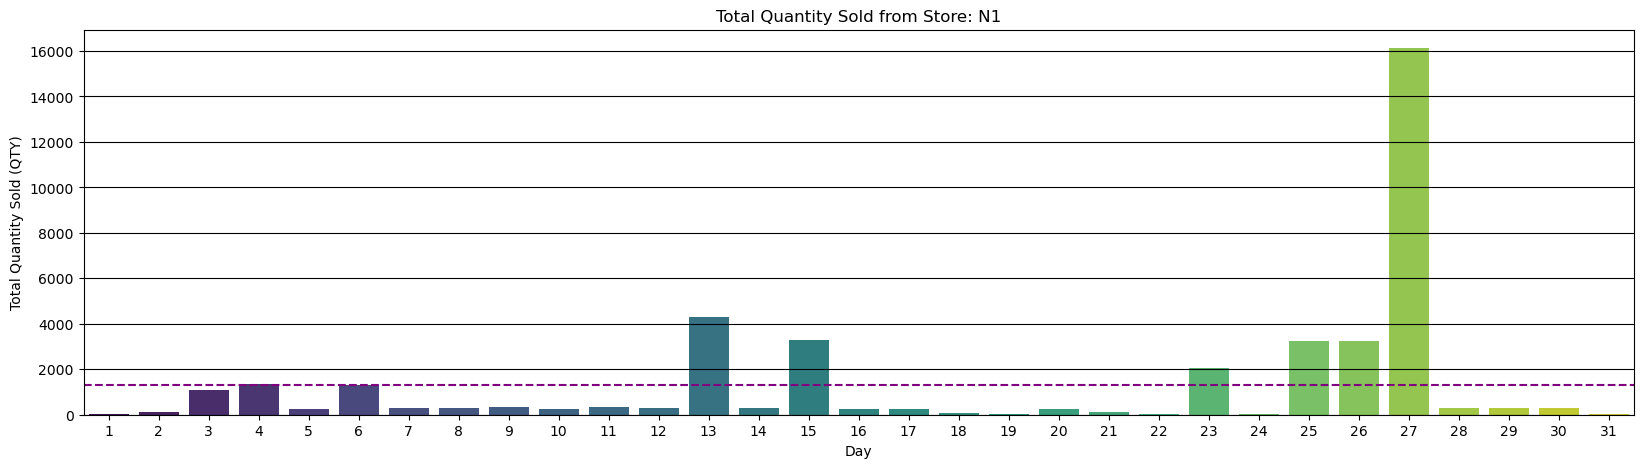

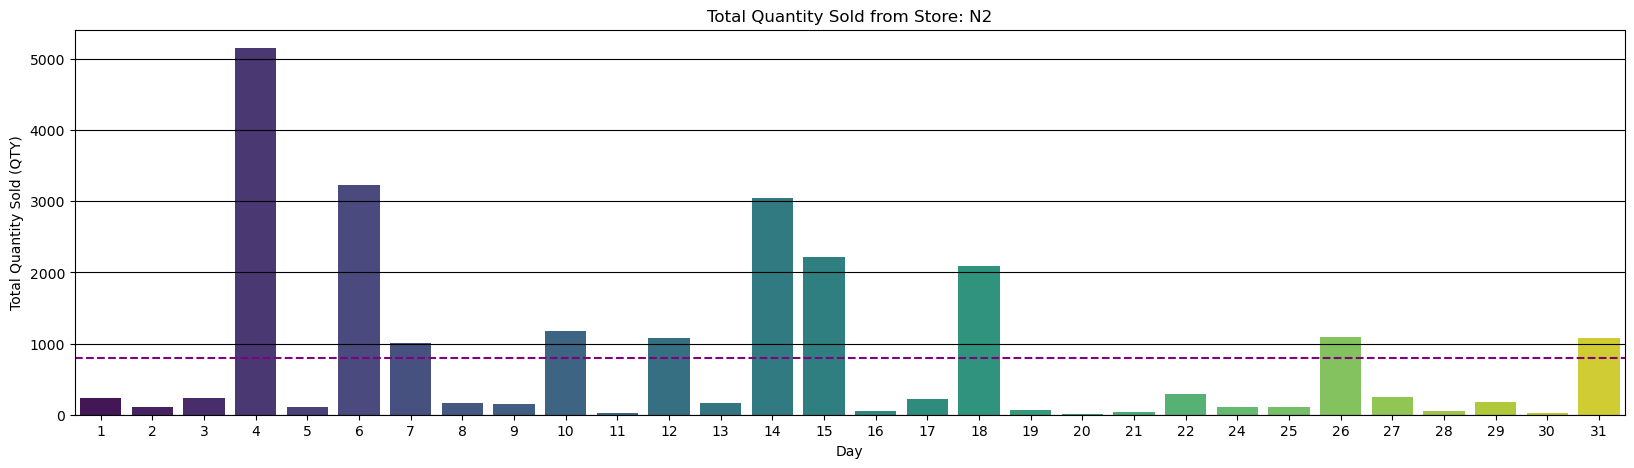

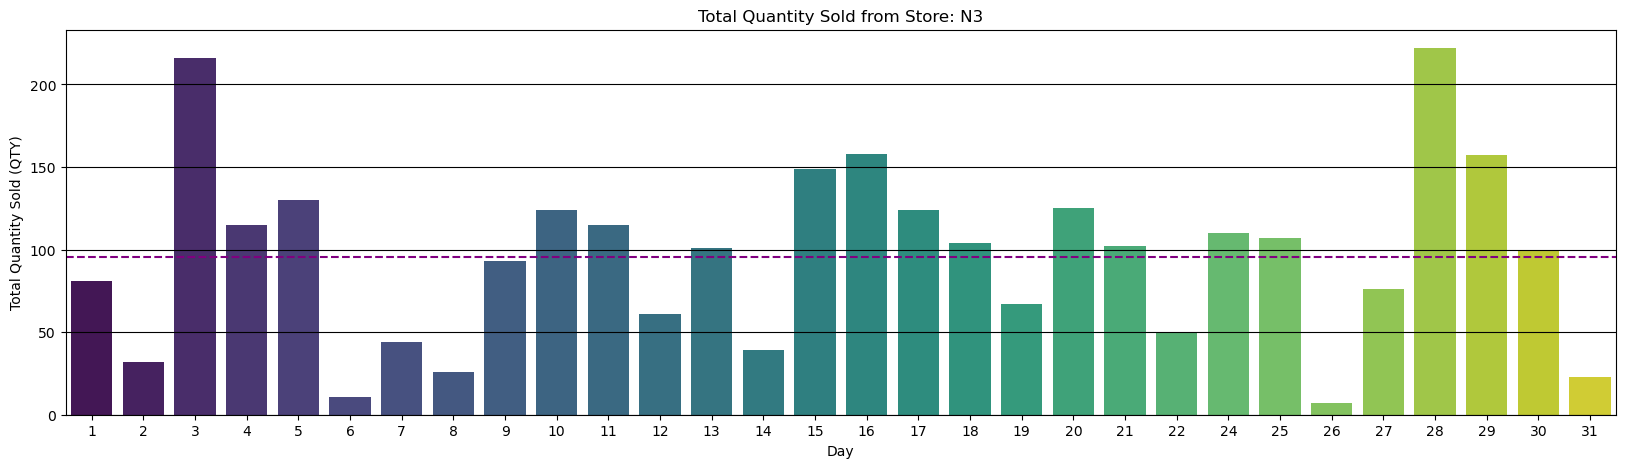

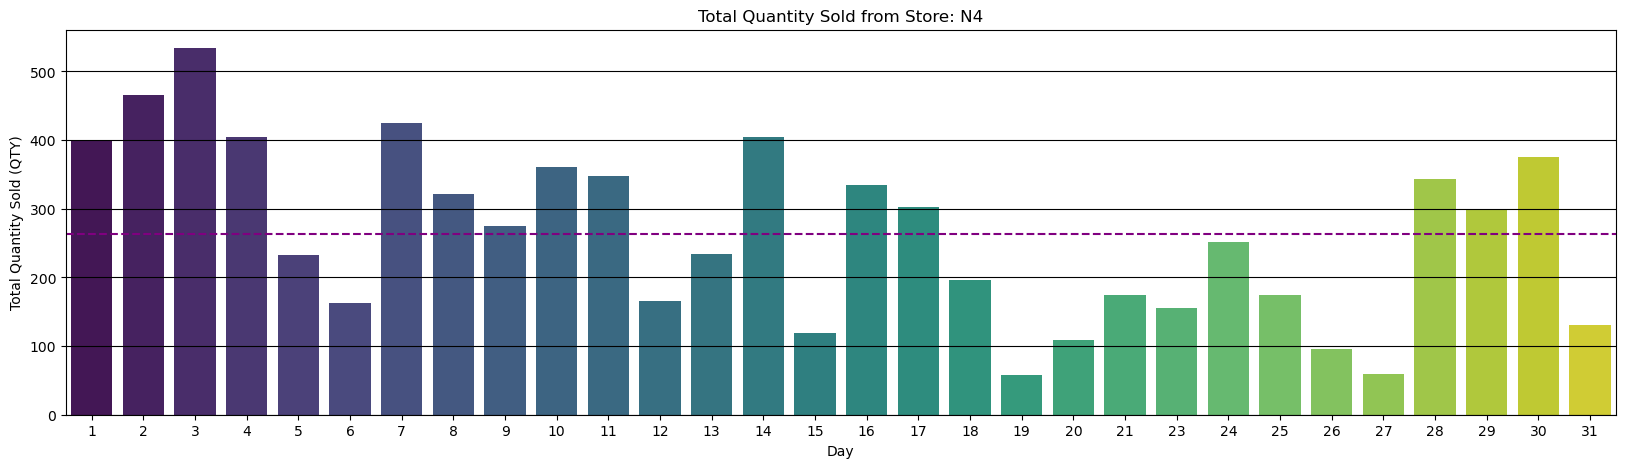

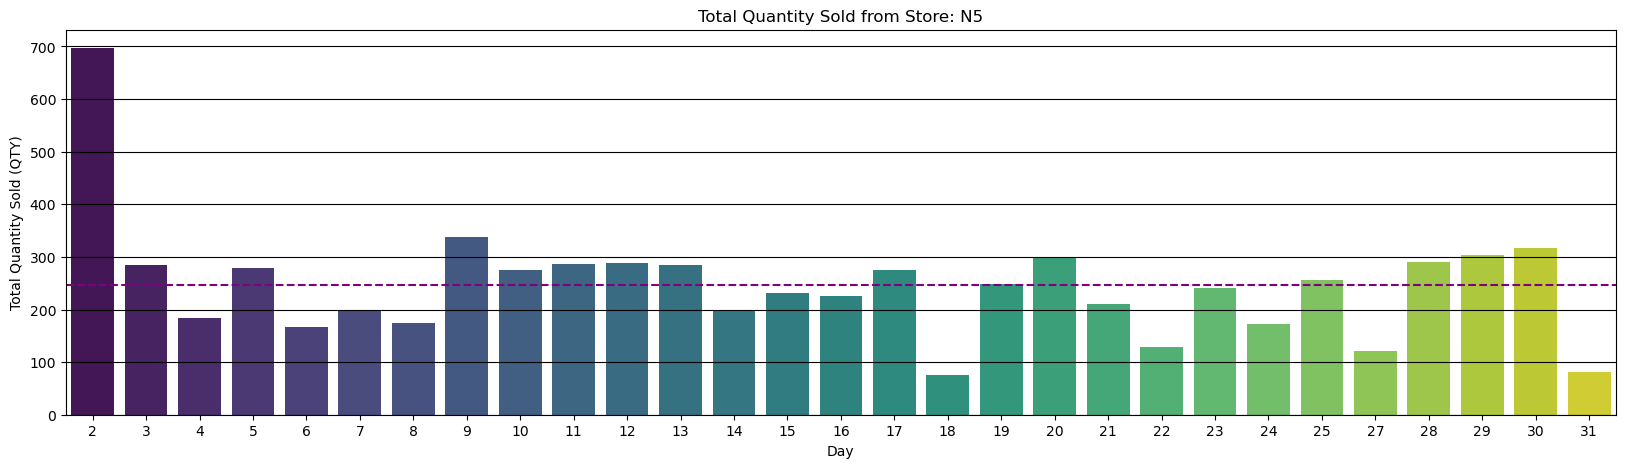

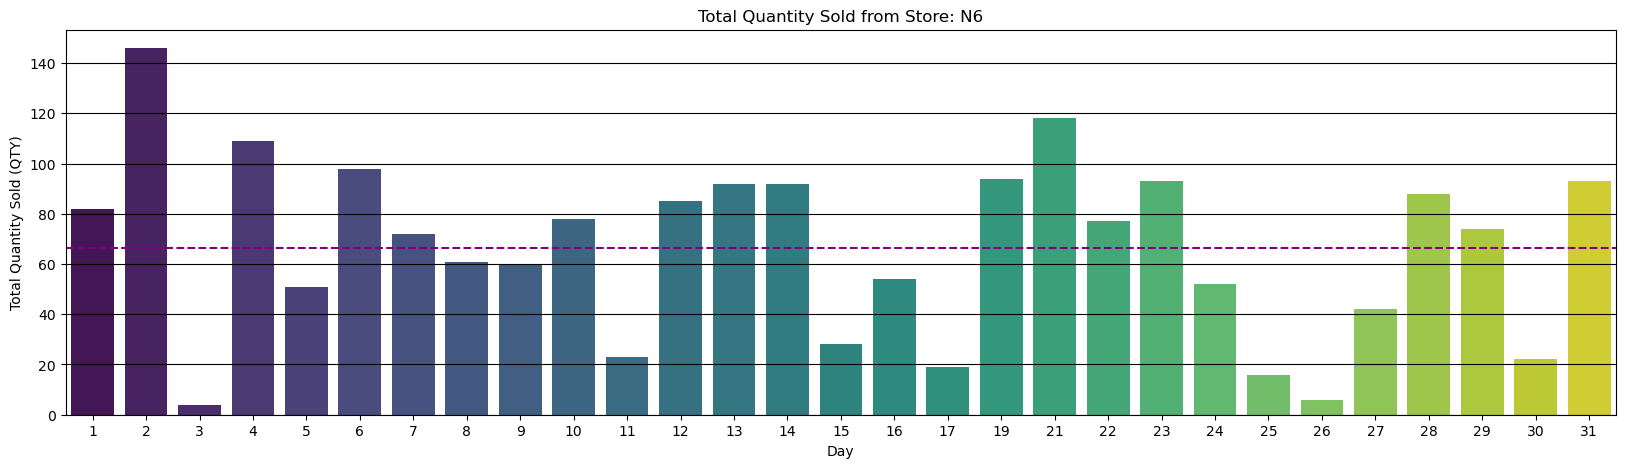

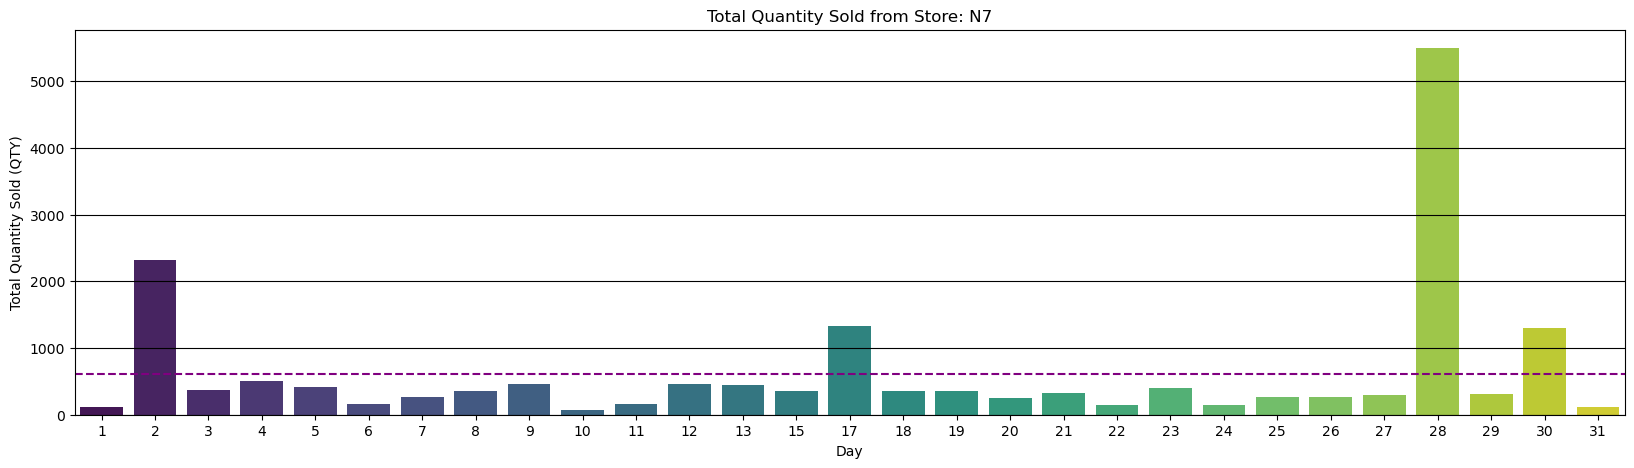

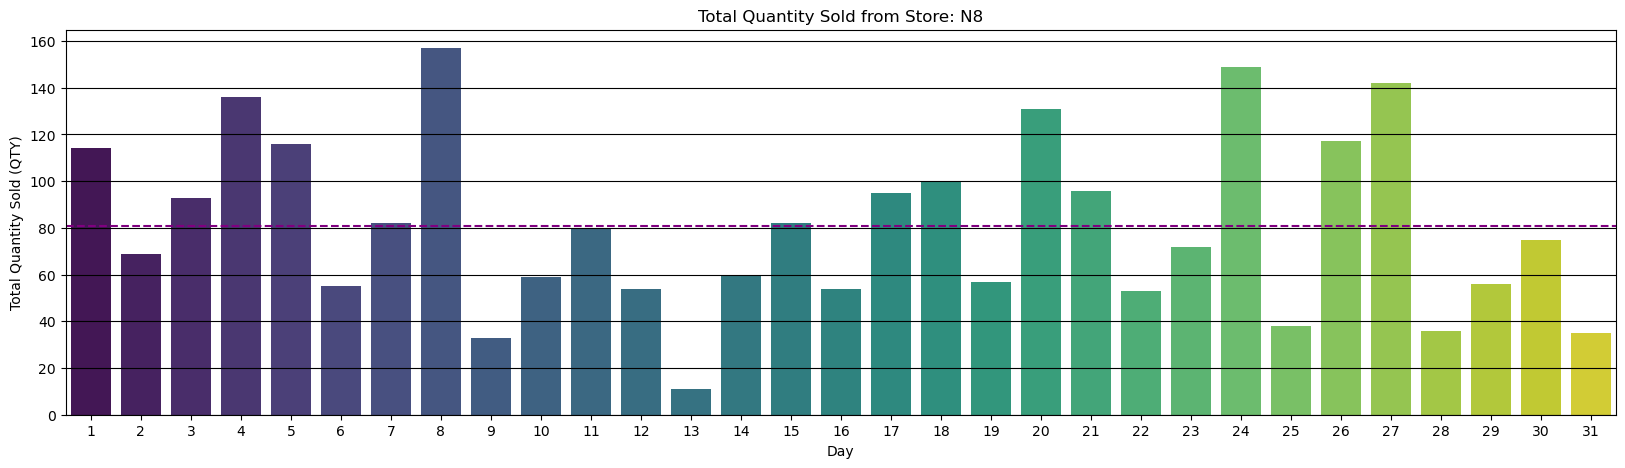

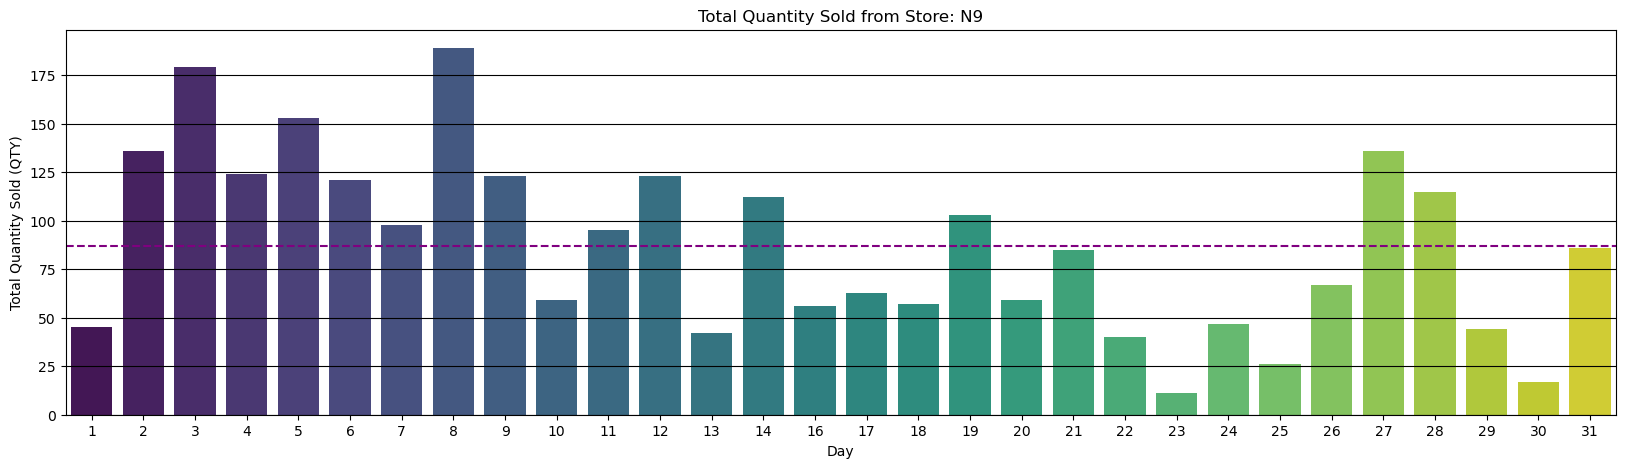

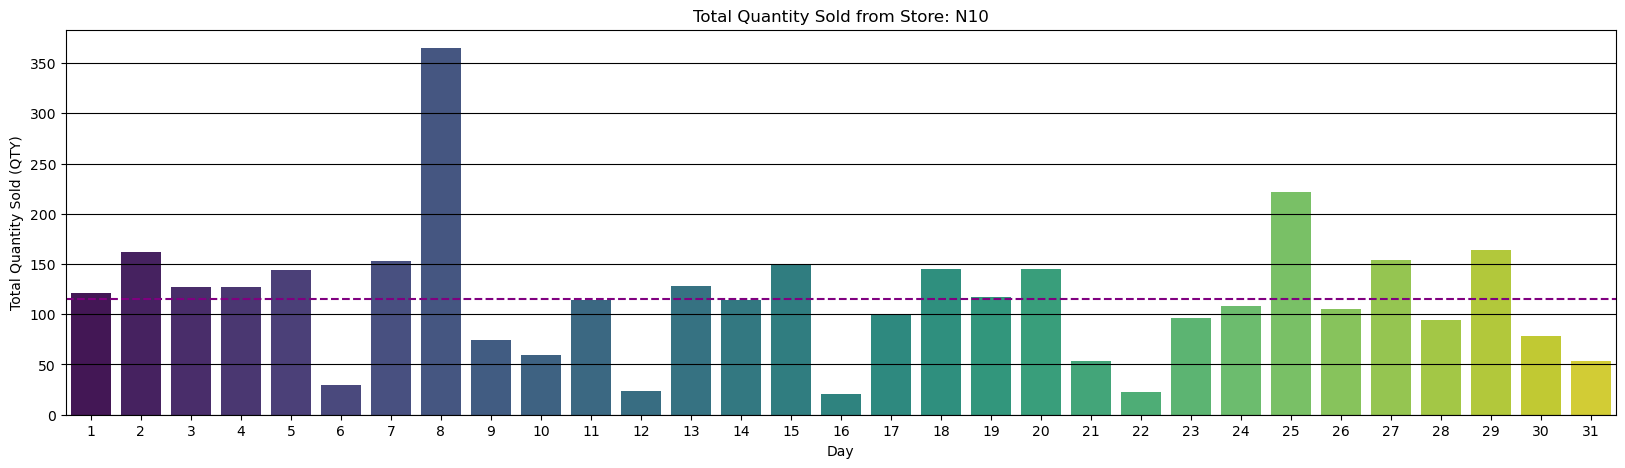

In [18]:
# Plot Quantity Sold by Day for Each Store


for store_code in data.STORECODE.unique():
    store_data = data[data.STORECODE == store_code].groupby("DAY").sum()
    plt.figure(figsize=(20, 5))
    sns.barplot(x=store_data.index, y=store_data["QTY"], palette="viridis")
    plt.axhline(store_data["QTY"].mean(), color='purple', linestyle='--')
    plt.title(f"Total Quantity Sold from Store: {store_code}")
    plt.xlabel("Day")
    plt.ylabel("Total Quantity Sold (QTY)")
    plt.grid(axis='y', color='black')
    plt.show()

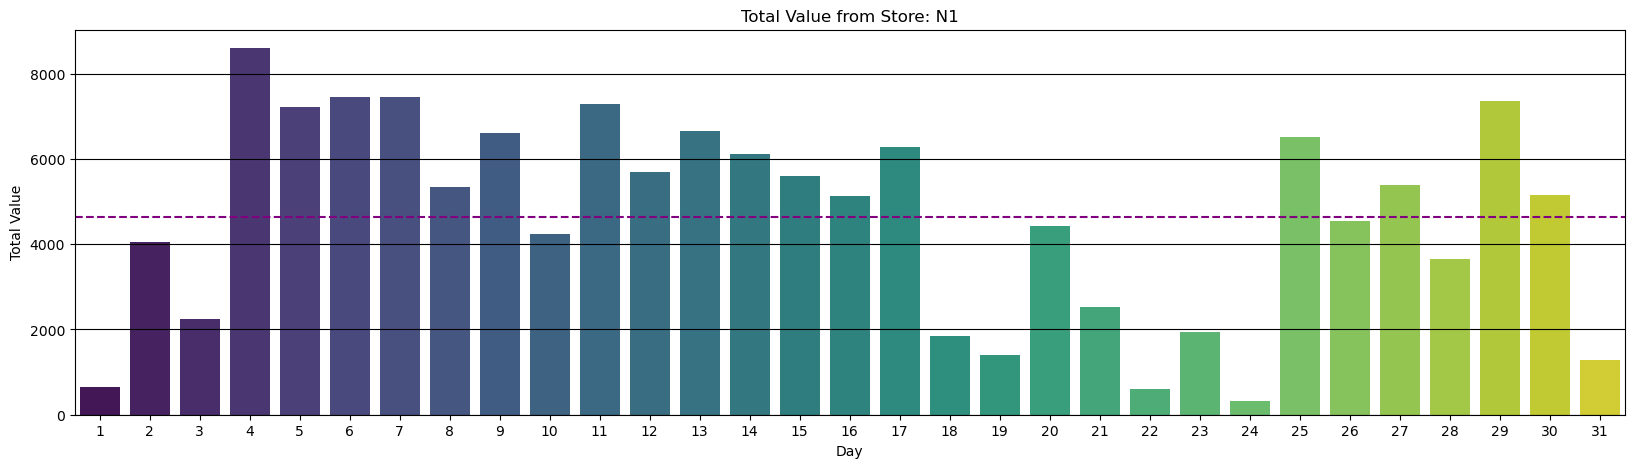

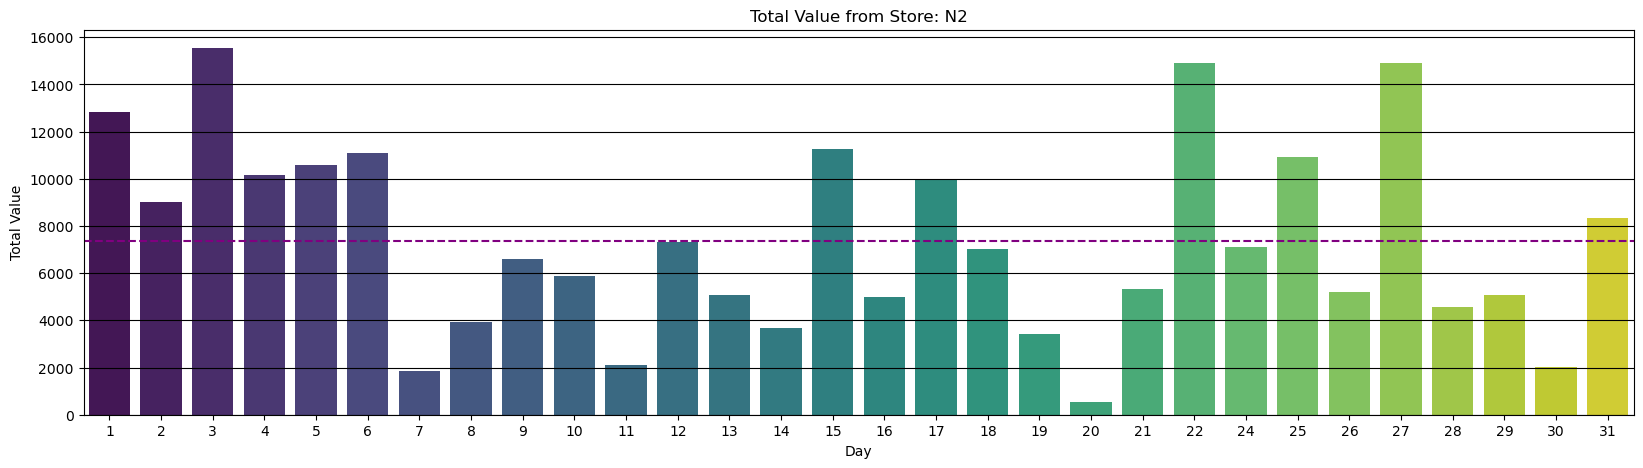

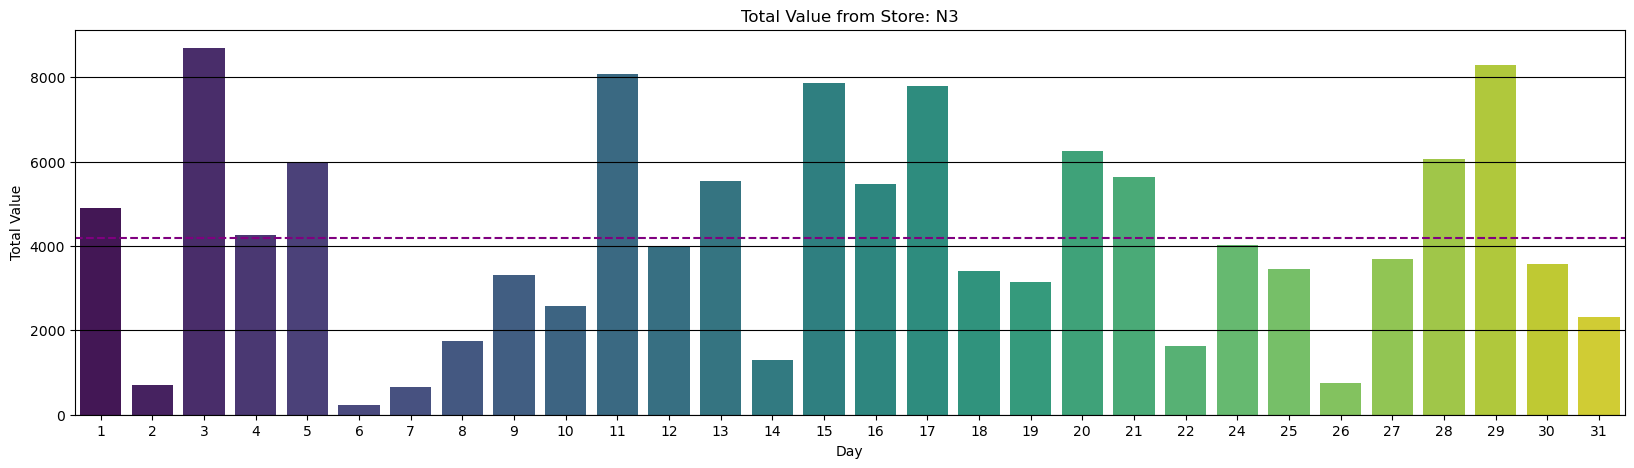

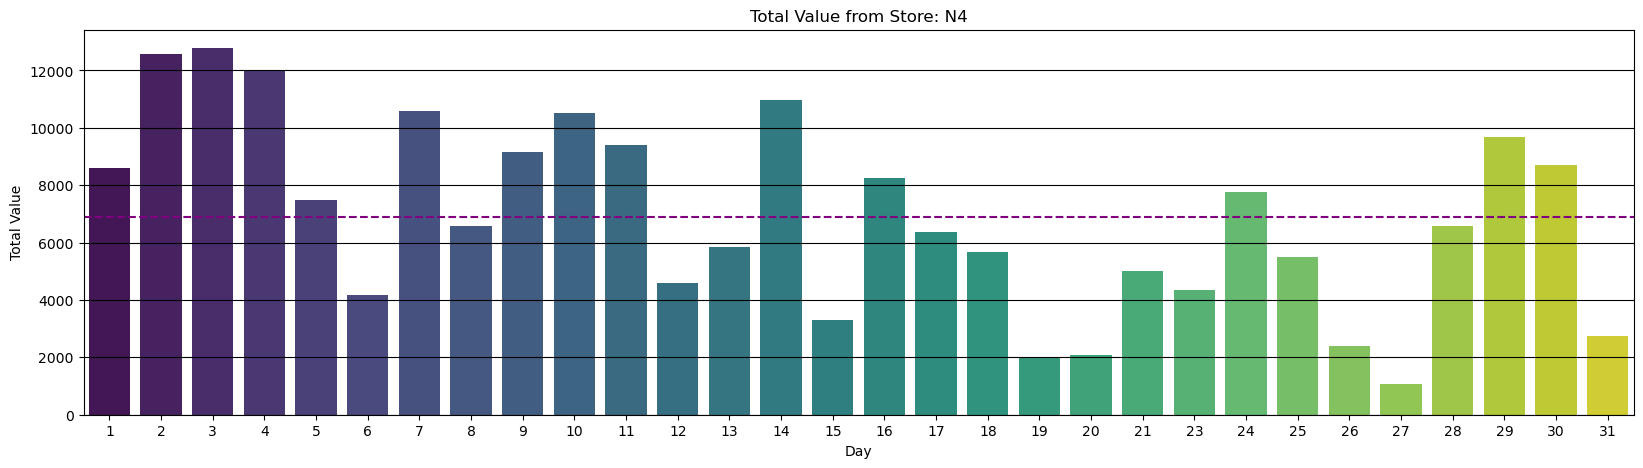

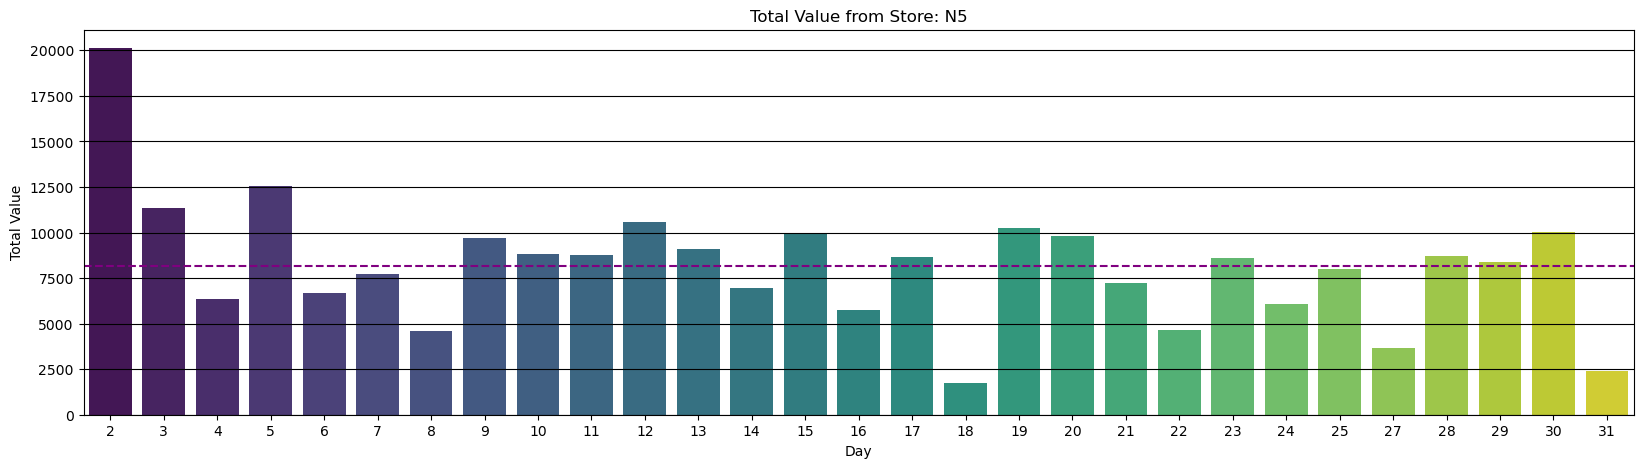

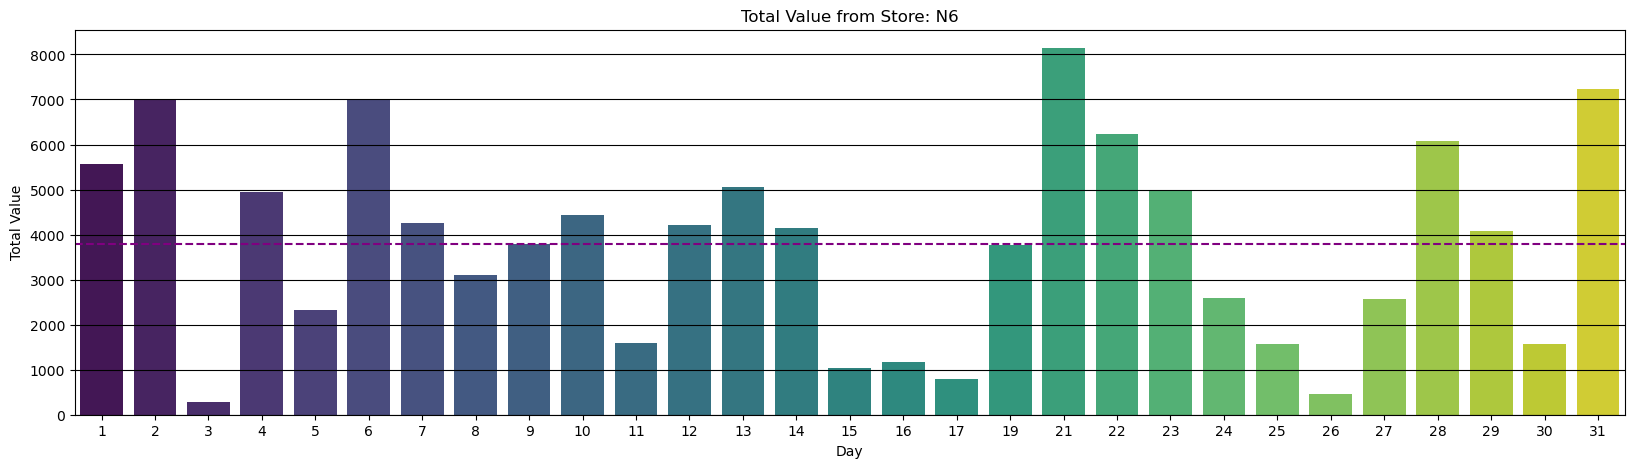

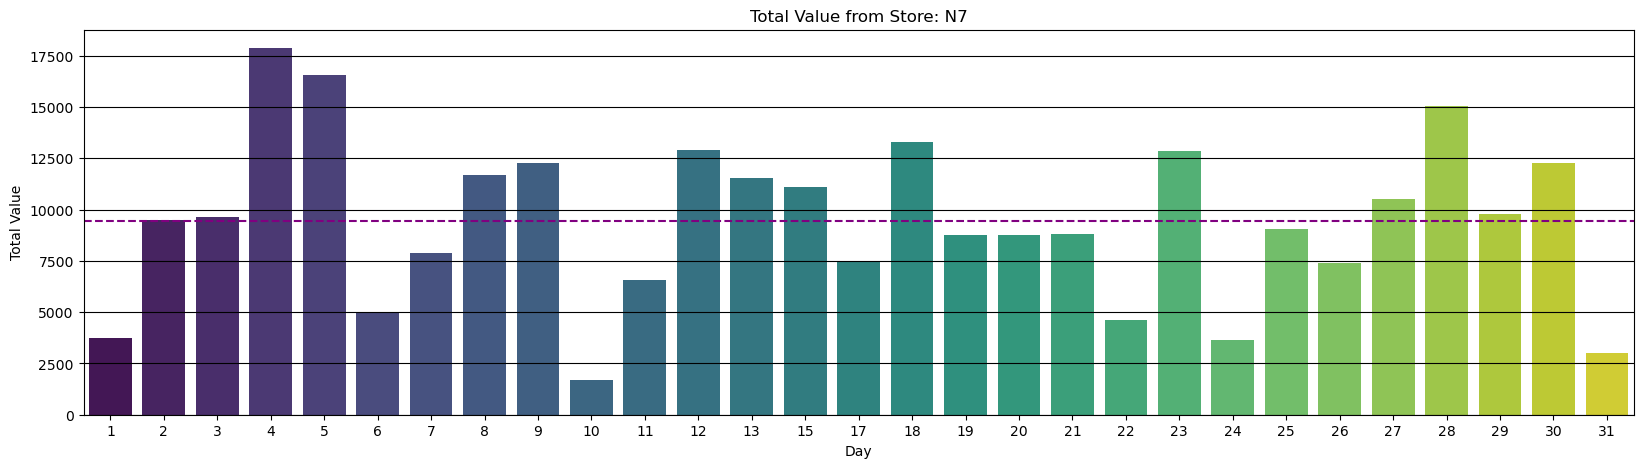

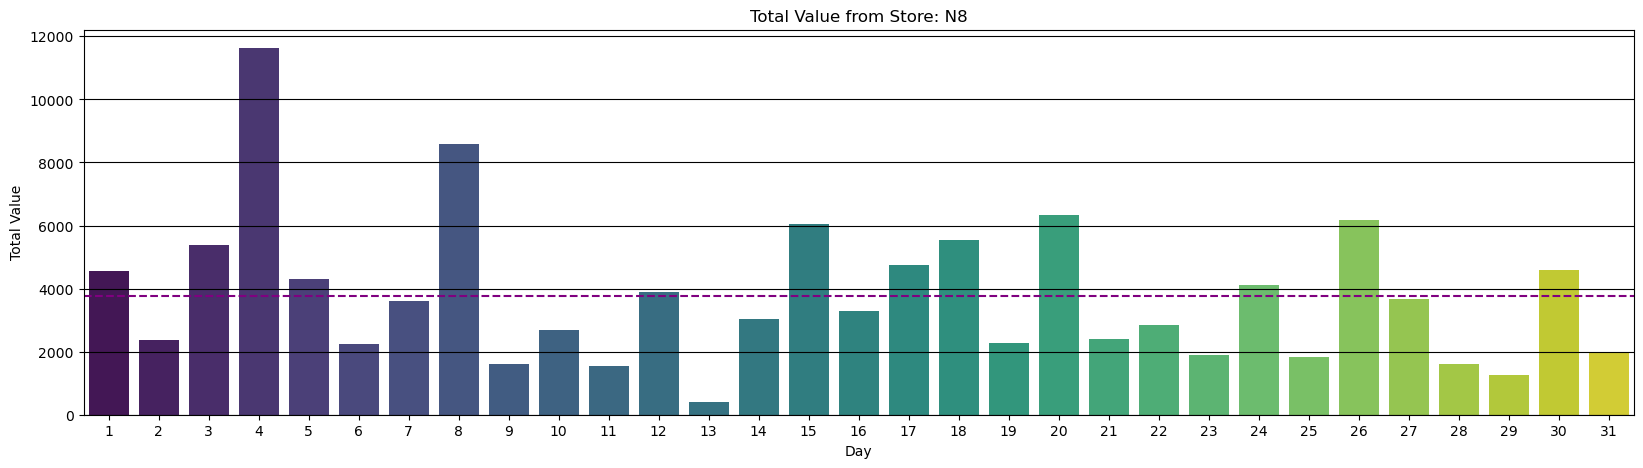

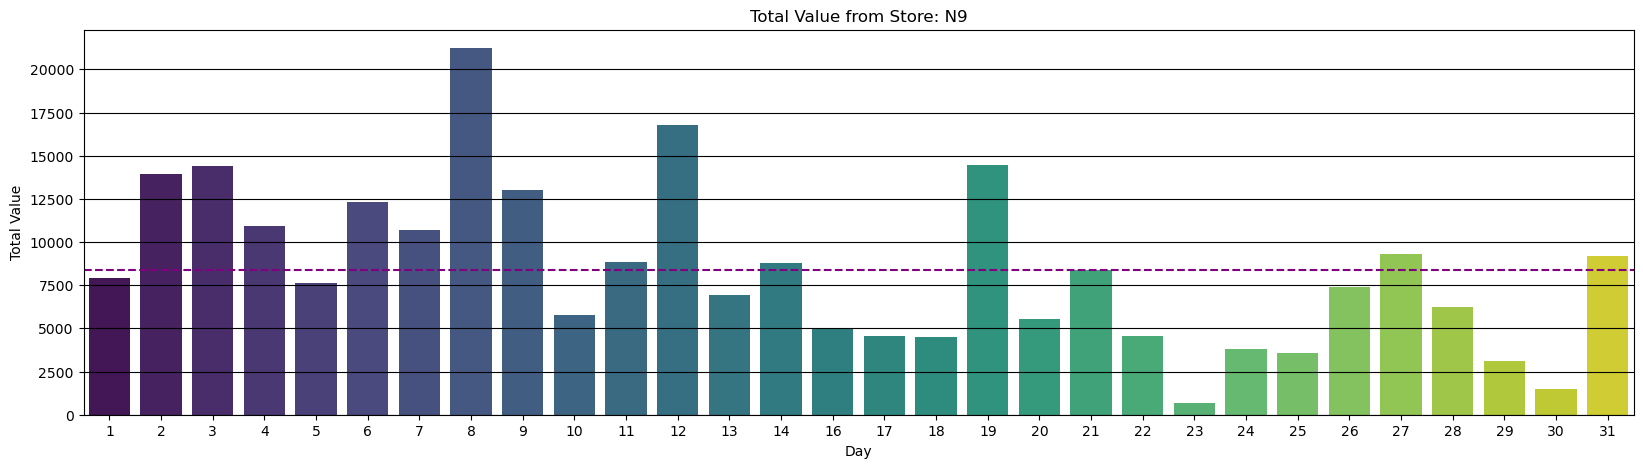

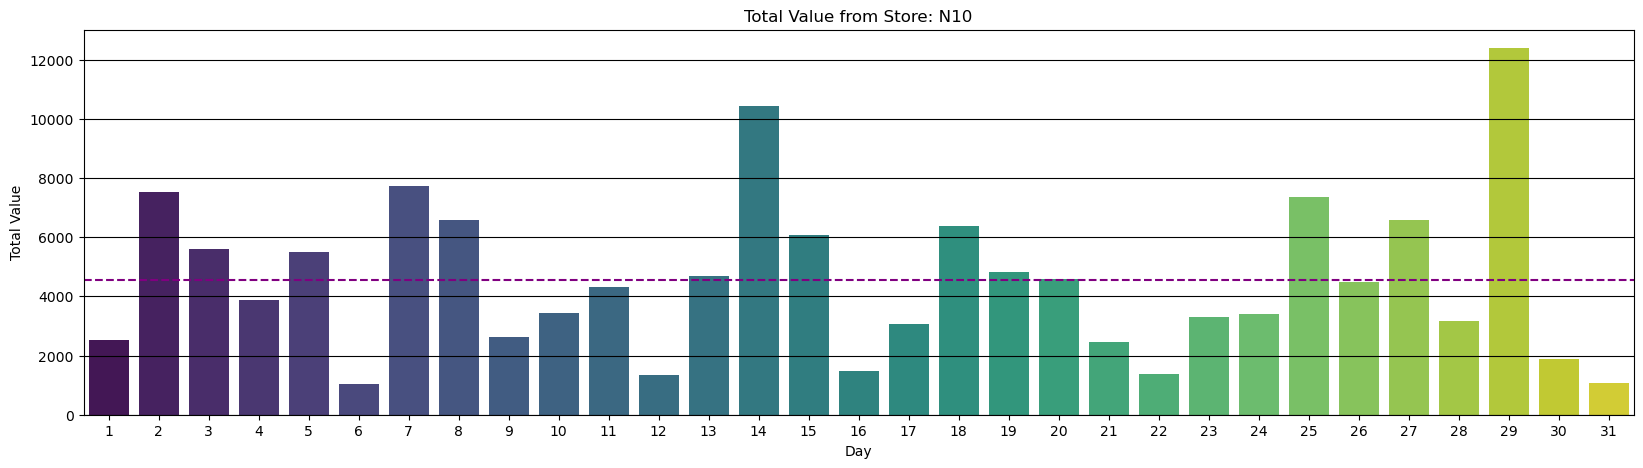

In [19]:
# Plot Value by Day for Each Store


for store_code in data.STORECODE.unique():
    store_data = data[data.STORECODE == store_code].groupby("DAY").sum()
    plt.figure(figsize=(20, 5))
    sns.barplot(x=store_data.index, y=store_data["VALUE"], palette="viridis")
    plt.axhline(store_data["VALUE"].mean(), color='purple', linestyle='--')
    plt.title(f"Total Value from Store: {store_code}")
    plt.xlabel("Day")
    plt.ylabel("Total Value")
    plt.grid(axis='y', color='black')
    plt.show()







# Sales per Month

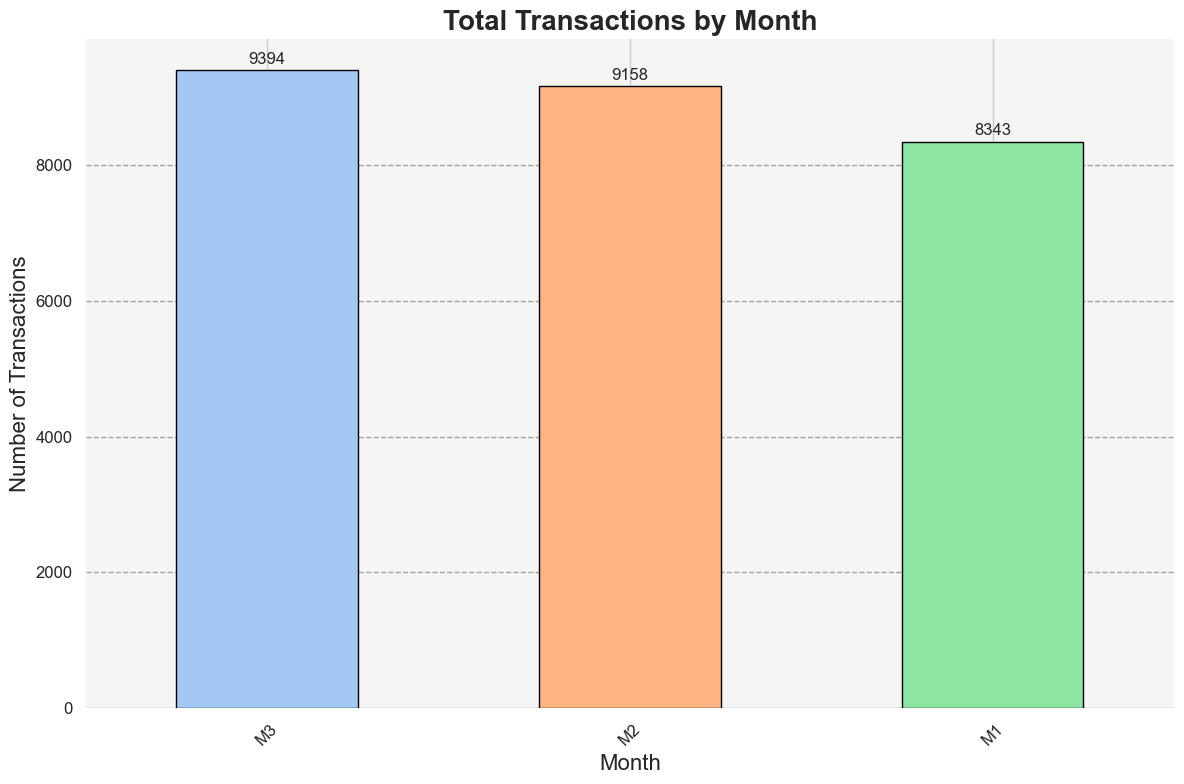

In [45]:

sns.set(style="whitegrid")
month_counts = data['MONTH'].value_counts()
plt.figure(figsize=(12, 8))
color_palette = sns.color_palette("pastel", len(month_counts))
bars = month_counts.plot(kind='bar', color=color_palette, edgecolor='black')
plt.title("Total Transactions by Month", fontsize=20, fontweight='bold')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.7)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', size=12, xytext=(0, 8), 
                 textcoords='offset points')
plt.gca().set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

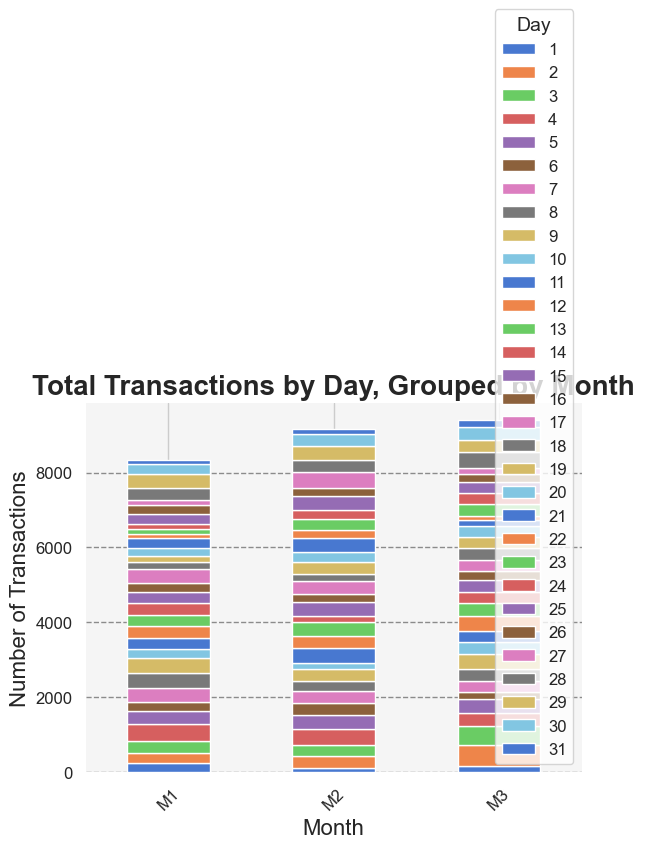

In [60]:
# Group by 'MONTH' and 'DAY', then count occurrences



grouped_data = data.groupby(['MONTH', 'DAY']).size().unstack()
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
color_palette = sns.color_palette("muted", len(grouped_data.columns))
bars = grouped_data.plot(kind='bar', stacked=True, color=color_palette)
plt.title("Total Transactions by Day, Grouped by Month", fontsize=20, fontweight='bold')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Transactions", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.9)
plt.gca().set_facecolor('whitesmoke')
plt.legend(title='Day', fontsize=12, title_fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

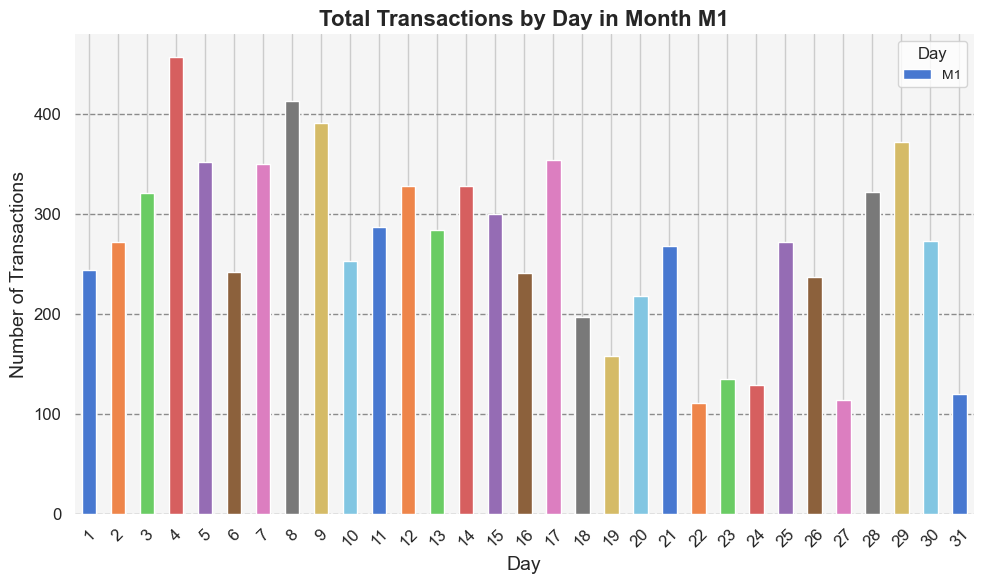

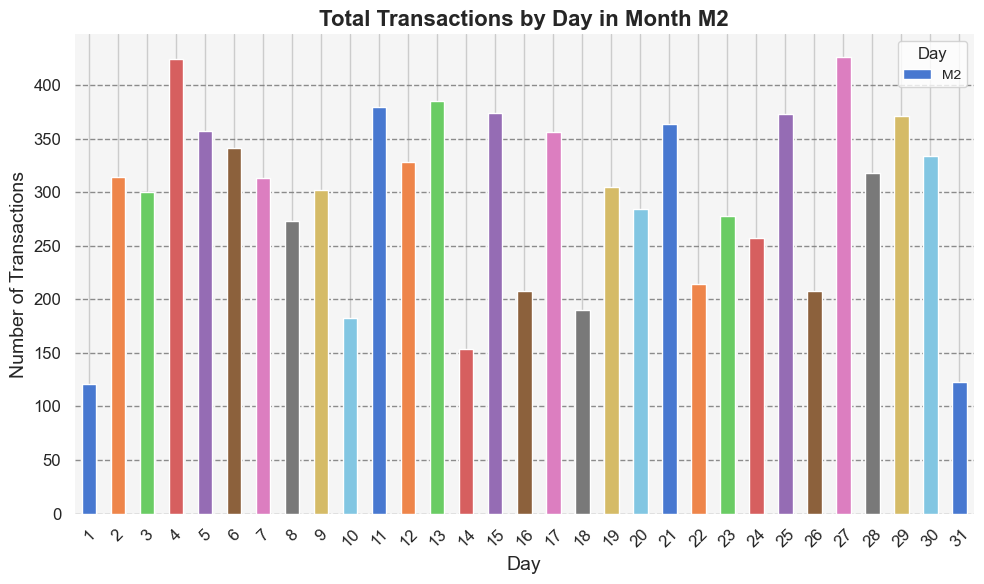

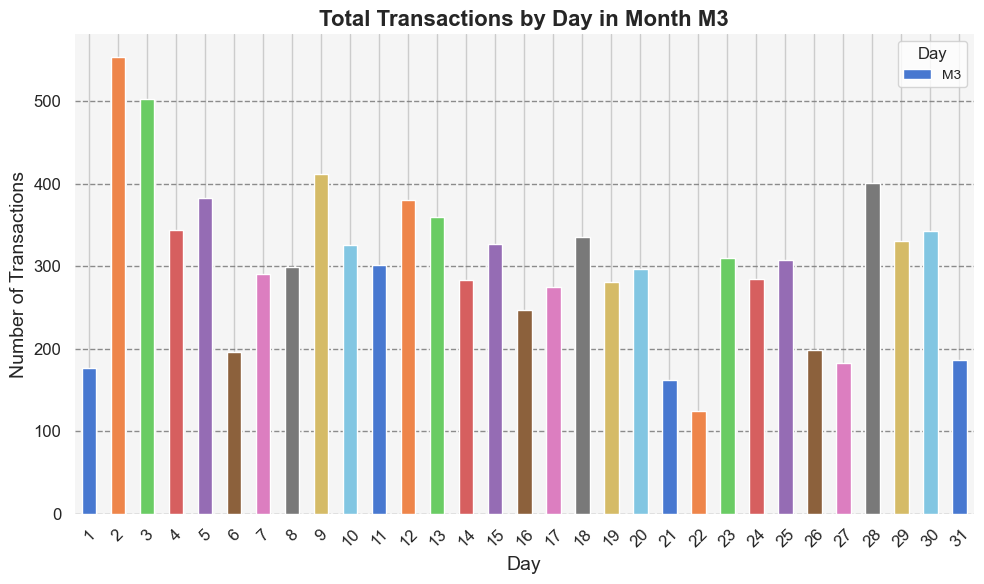

In [61]:
# Group by 'MONTH' and 'DAY', then count occurrences


grouped_data = data.groupby(['MONTH', 'DAY']).size().unstack()
sns.set(style="whitegrid")
color_palette = sns.color_palette("muted", len(grouped_data.columns))
for month, month_data in grouped_data.iterrows():
    # Create a new figure and axis for each plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    bars = month_data.plot(kind='bar', stacked=True, color=color_palette, ax=ax)
    plt.title(f"Total Transactions by Day in Month {month}", fontsize=16, fontweight='bold')
    plt.xlabel("Day", fontsize=14)
    plt.ylabel("Number of Transactions", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', color='gray', linestyle='--', alpha=0.9)
    plt.gca().set_facecolor('whitesmoke')
    plt.legend(title='Day', fontsize=10, title_fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

In [22]:
data.groupby('DAY')['VALUE'].sum().sort_values(ascending=False)

DAY
4     90621.08
2     86833.75
3     85863.94
5     80150.55
8     73340.00
12    71280.86
29    69439.07
9     68727.39
7     62399.71
15    62257.05
28    61697.30
27    61355.15
13    60822.78
17    59780.72
11    58497.25
25    57759.31
6     57320.68
21    55977.26
14    55409.73
19    54253.78
1     51290.80
30    51280.47
10    50095.00
18    49393.78
20    48347.86
24    42844.76
22    41401.29
16    40545.75
31    39550.56
26    38717.47
23    38590.15
Name: VALUE, dtype: float64

In [23]:
#these are the top 60 customer which bought salty snacks must frequently


data[(data['GRP']=='SALTY SNACKS (2/97)')]['BILL_ID'].value_counts().head(60)

BILL_ID
T1036    6
T1062    5
T218     5
T951     5
T1473    5
T707     5
T1255    4
T2559    4
T3746    4
T1028    4
T1124    4
T3653    4
T1161    4
T1292    4
T1466    4
T7635    4
T772     4
T489     4
T5932    3
T1486    3
T28      3
T9121    3
T1311    3
T1359    3
T774     3
T471     3
T8677    3
T476     3
T744     3
T6293    3
T536     3
T846     3
T6686    3
T1182    3
T16      3
T2935    3
T3067    3
T2300    3
T3221    3
T1671    3
T3257    3
T1113    3
T518     3
T1761    3
T1018    3
T6001    3
T1753    3
T946     3
T3340    3
T1906    3
T825     3
T2292    3
T1863    3
T5742    3
T1742    3
T1350    3
T1798    3
T1149    3
T1285    3
T654     3
Name: count, dtype: int64

In [24]:
#these are the top 60 customer which bought chocolates must frequently

data[(data['GRP']=='CHOCOLATE')]['BILL_ID'].value_counts().head(60)

BILL_ID
T92      5
T1453    5
T77      5
T2342    5
T2919    4
T522     4
T7026    4
T668     4
T505     3
T2543    3
T7207    3
T1557    3
T1534    3
T3775    3
T1812    3
T4911    3
T1872    3
T1447    3
T3399    3
T3848    3
T564     3
T2470    3
T63      3
T7058    3
T5236    3
T6876    3
T1654    3
T1313    3
T7725    3
T849     3
T7443    3
T940     3
T526     3
T7487    3
T1481    3
T536     3
T1280    3
T4598    3
T2474    3
T777     3
T3451    2
T1420    2
T6870    2
T7641    2
T1746    2
T7688    2
T3465    2
T3229    2
T1672    2
T1685    2
T2942    2
T3961    2
T3226    2
T2028    2
T1577    2
T1433    2
T4080    2
T1734    2
T1451    2
T1733    2
Name: count, dtype: int64

In [25]:
customer=data.groupby('BILL_ID')['GRP'].value_counts()


In [26]:
#these are the cusstomer which bought following items must


customer.sort_values(ascending=False).head(60)

BILL_ID  GRP                       
T7794    BISCUITS - CORE & NON CORE    17
T3293    BISCUITS - CORE & NON CORE    15
T377     BISCUITS - CORE & NON CORE    14
T557     BISCUITS - CORE & NON CORE    14
T212     BISCUITS - CORE & NON CORE    13
T119     BISCUITS - CORE & NON CORE    13
T898     BISCUITS - CORE & NON CORE    12
T1521    BISCUITS - CORE & NON CORE    12
T1355    BISCUITS - CORE & NON CORE    12
T322     BISCUITS - CORE & NON CORE    11
T591     BISCUITS - CORE & NON CORE    11
T8909    BISCUITS - CORE & NON CORE    11
T668     BISCUITS - CORE & NON CORE    10
T1018    BISCUITS - CORE & NON CORE    10
T8020    BISCUITS - CORE & NON CORE    10
T1028    BISCUITS - CORE & NON CORE    10
T3075    BISCUITS - CORE & NON CORE     9
T405     BISCUITS - CORE & NON CORE     9
T87      BISCUITS - CORE & NON CORE     9
T576     BISCUITS - CORE & NON CORE     9
T399     BISCUITS - CORE & NON CORE     9
T1331    BISCUITS - CORE & NON CORE     9
T5339    BISCUITS - CORE & NON CORE     



# what are the item is taking by which customers

In [27]:
# following things are takiing by our top customer


data[data['BILL_ID']=='T7794']['GRP'].value_counts()

GRP
BISCUITS - CORE & NON CORE       17
VERMICELLI & NOODLE               3
KETCHUPS/SAUCES                   2
SPICES (03/04)                    2
SALTY SNACKS (2/97)               2
BREAKFAST CEREALS                 1
TOOTH BRUSH   (7/93)              1
BEVERAGES                         1
PACKAGED TEA                      1
REFINED EDIBLE OILS-ALL PACKS     1
CHOCOLATE                         1
Name: count, dtype: int64

In [28]:
#following things are takiing by our top customer


data[data['BILL_ID']=='T3293']['GRP'].value_counts()

GRP
BISCUITS - CORE & NON CORE        15
CHOCOLATE                          2
VERMICELLI & NOODLE                2
BUTTER MARGR  (4/94)               2
PACKAGED TEA                       2
SANITARY NAPKINS                   1
TOILET SOAPS (04/00)               1
PRE-POST WASH PRODUCTS             1
WASHING POWDERS/LIQUIDS            1
PACKAGED PURE GHEE                 1
BREAKFAST CEREALS                  1
SQSH CRDLS & SFT DRNK-CONVERTD     1
ALL IODISED SALT                   1
Name: count, dtype: int64

# Brand preffered by our top customer on the biscuit item

In [29]:
data[(data['BILL_ID']=='T3293') &(data['GRP']=='BISCUITS - CORE & NON CORE')] ['BRD'].value_counts()

BRD
BRITANNIA BOURBON                2
MARIE GOLD REGULAR               2
OREO CHOCOLATE                   1
OREO STRAWBERRY                  1
50-50 MSK CK                     1
PARLE 20-20 NICE                 1
BOURNVITA                        1
NUTRICHOICE OATS COOKIES         1
50-50 REGULAR                    1
LITTLE HEARTS                    1
SUNFEAST DARK FANTASY VANILLA    1
TREAT JAM                        1
GOOD DAY CASHEW                  1
Name: count, dtype: int64

In [30]:
#most sold brand on our stores


data['BRD'].value_counts().sort_values(ascending=False).head(15)

BRD
MARIE GOLD REGULAR       777
AMUL                     775
EVEREST                  669
MAGGI MASALA             641
PARLE-G                  602
DAIRY MILK               499
GOOD DAY CASHEW          499
MONACO                   473
SOCIETY LEAF             426
VIM                      385
TATA SALT                367
PARLE KRACK JACK         351
BRITANNIA BOURBON        310
FORTUNE                  273
NUTRICHOICE DIGESTIVE    273
Name: count, dtype: int64

In [31]:
data[['BILL_ID','GRP']]

BILL_ID                         GRP
0        T375        BUTTER MARGR  (4/94)
1        T379     CONFECTIONERY - ECLAIRS
2        T381                   CHOCOLATE
3        T382                PACKAGED TEA
4        T384            ALL IODISED SALT
...       ...                         ...
26980   T5999  BISCUITS - CORE & NON CORE
26981   T6007  BISCUITS - CORE & NON CORE
26982   T6007  BISCUITS - CORE & NON CORE
26983   T6007            CLEANERS - GLASS
26984   T6013  BISCUITS - CORE & NON CORE

[26895 rows x 2 columns]

after doing random experiment most common items customer preffered are:-->

In [32]:
grouped=data.groupby('BILL_ID')['GRP'].apply(set)
common_items_specific = set.intersection(*grouped.sample(2))
common_items_specific


{'BISCUITS - CORE & NON CORE'}

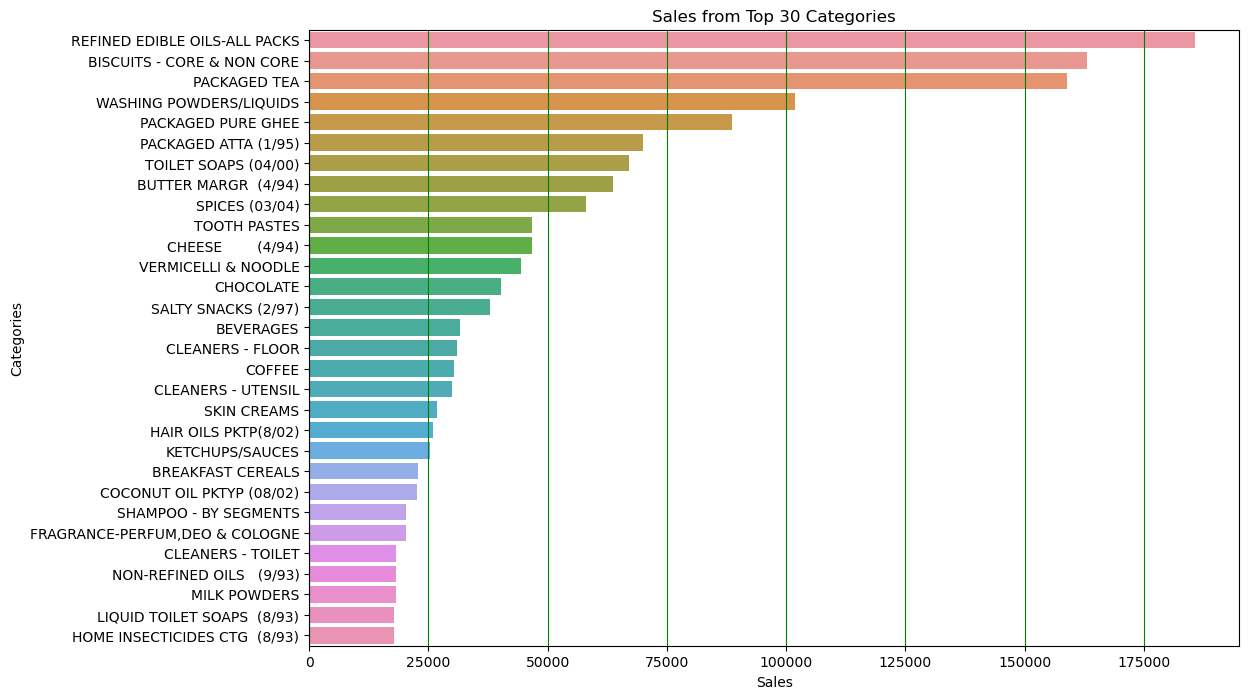

In [33]:
top_items_sales = data.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY','PRICE','VALUE']][0:30]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Sales from Top 30 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='green');

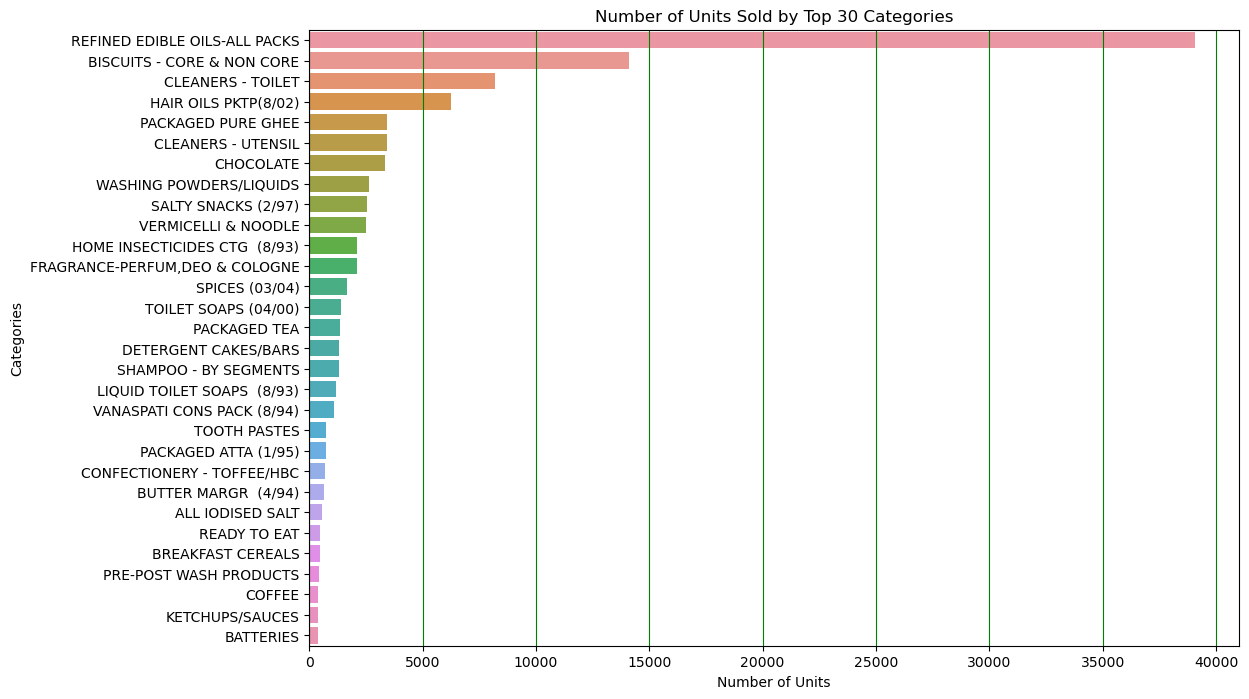

In [34]:
top_items = data.groupby('GRP').sum().sort_values("QTY",ascending=False)[['QTY','PRICE']][0:30]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY',y=top_items.index,data=top_items)
plt.title("Number of Units Sold by Top 30 Categories")
plt.xlabel("Number of Units")
plt.ylabel("Categories")
plt.grid(axis='x',color='green');


# How much sales is done in all the individual store ?




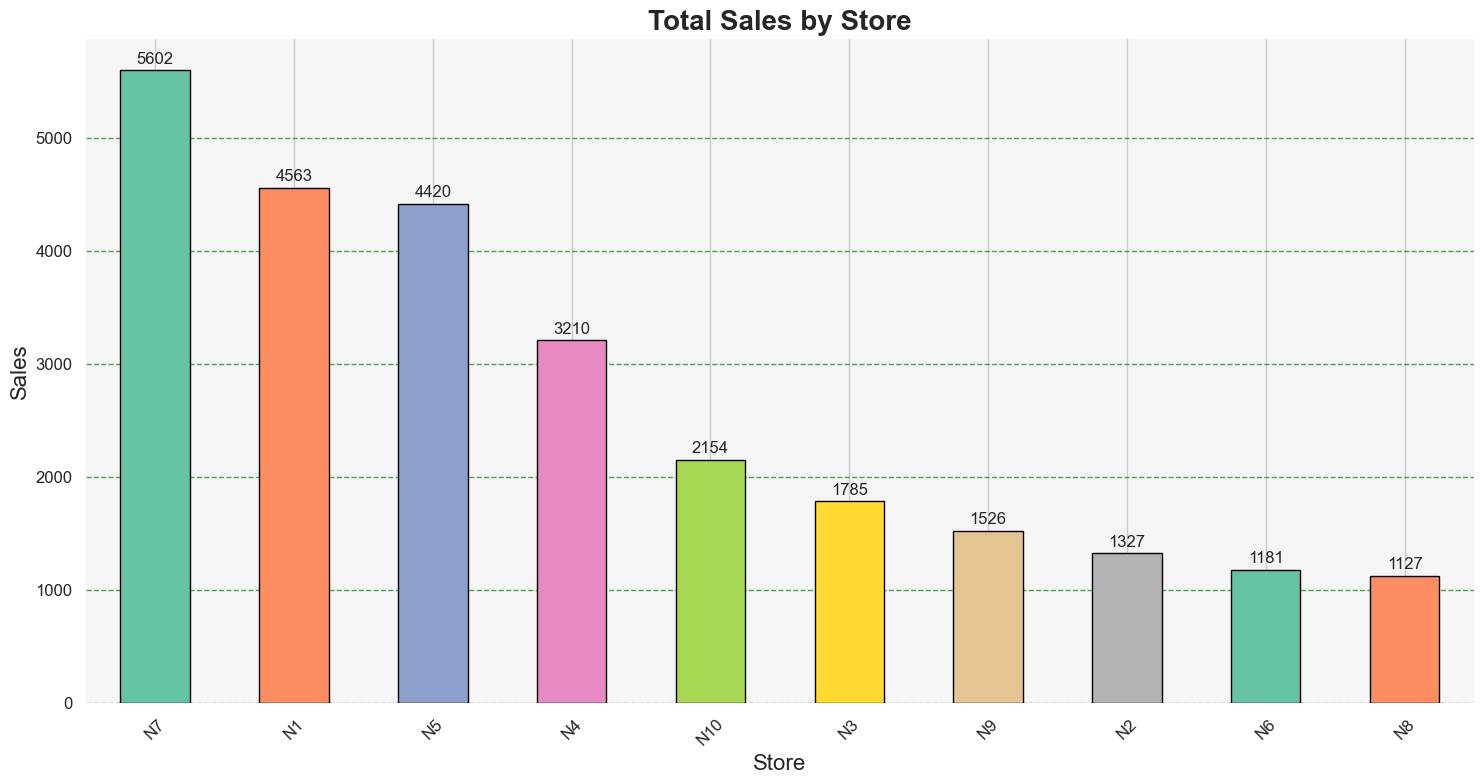

In [43]:
# Get the count of sales by STORECODE


store_counts = data['STORECODE'].value_counts()
plt.figure(figsize=(15, 8))
color_palette = sns.color_palette("Set2", len(store_counts))
bars = store_counts.plot(kind='bar', color=color_palette, edgecolor='black')
plt.title("Total Sales by Store", fontsize=20, fontweight='bold')
plt.xlabel("Store", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='green', linestyle='--', alpha=0.7)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', size=12, xytext=(0, 8), 
                 textcoords='offset points')
plt.gca().set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


We can observe that storeno 7,9,5,and 4 are top in selling in the interval of 3 months. Also variability of sales and daily sales each month in total and average.

Text(0, 0.5, 'Sales')

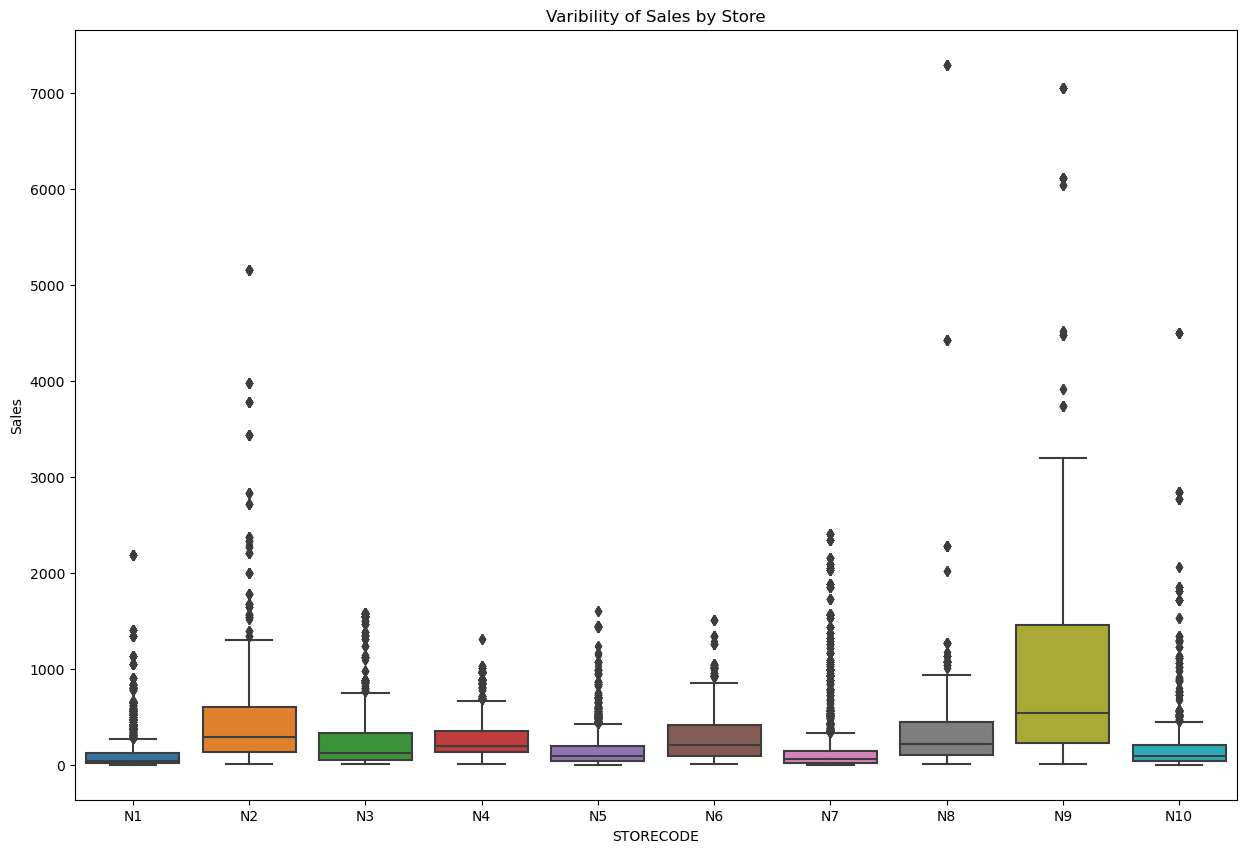

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(x=data["STORECODE"],y=data["BILL_AMT"],data=data)
plt.title("Varibility of Sales by Store")
plt.ylabel("Sales")

univariate analysis by creating histograms for the numerical columns and bar plots for the categorical columns 

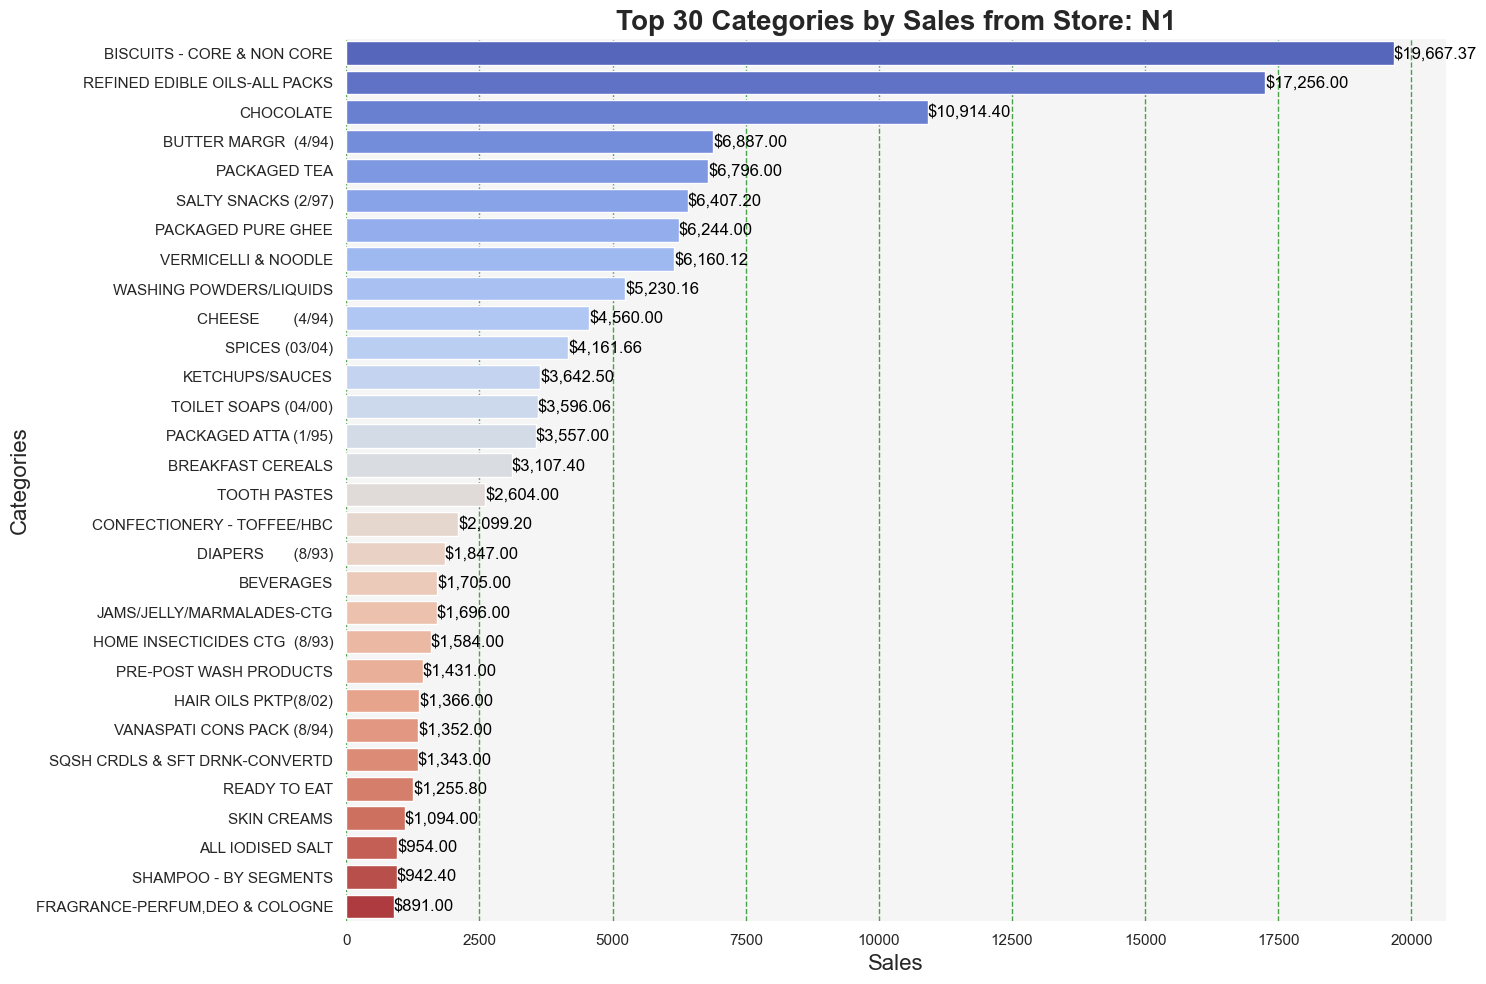

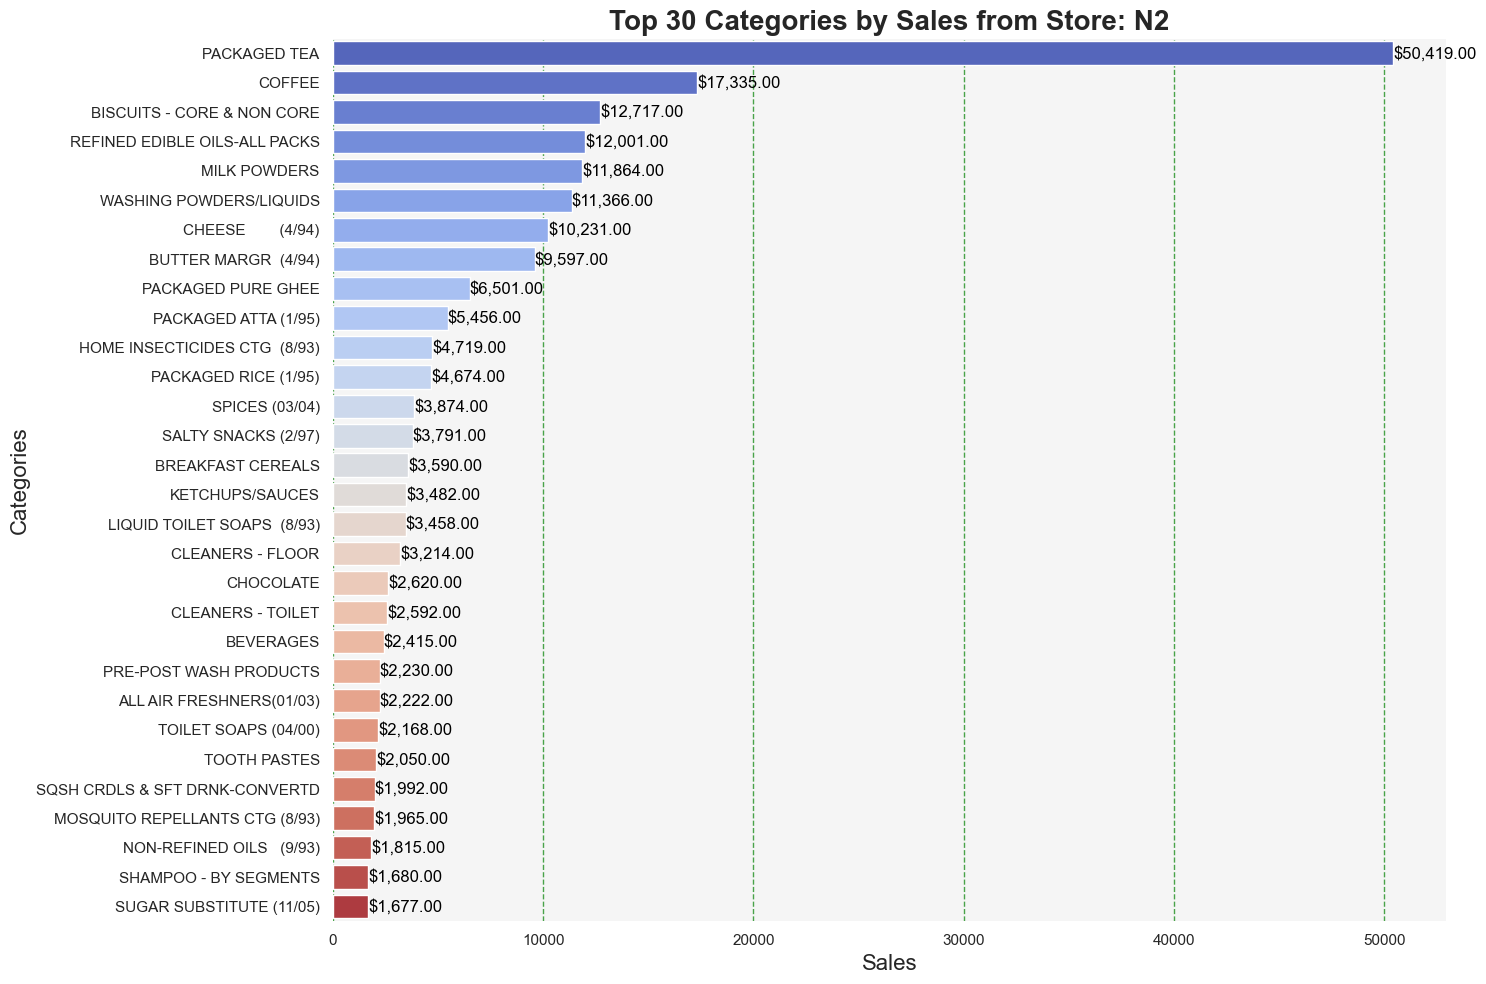

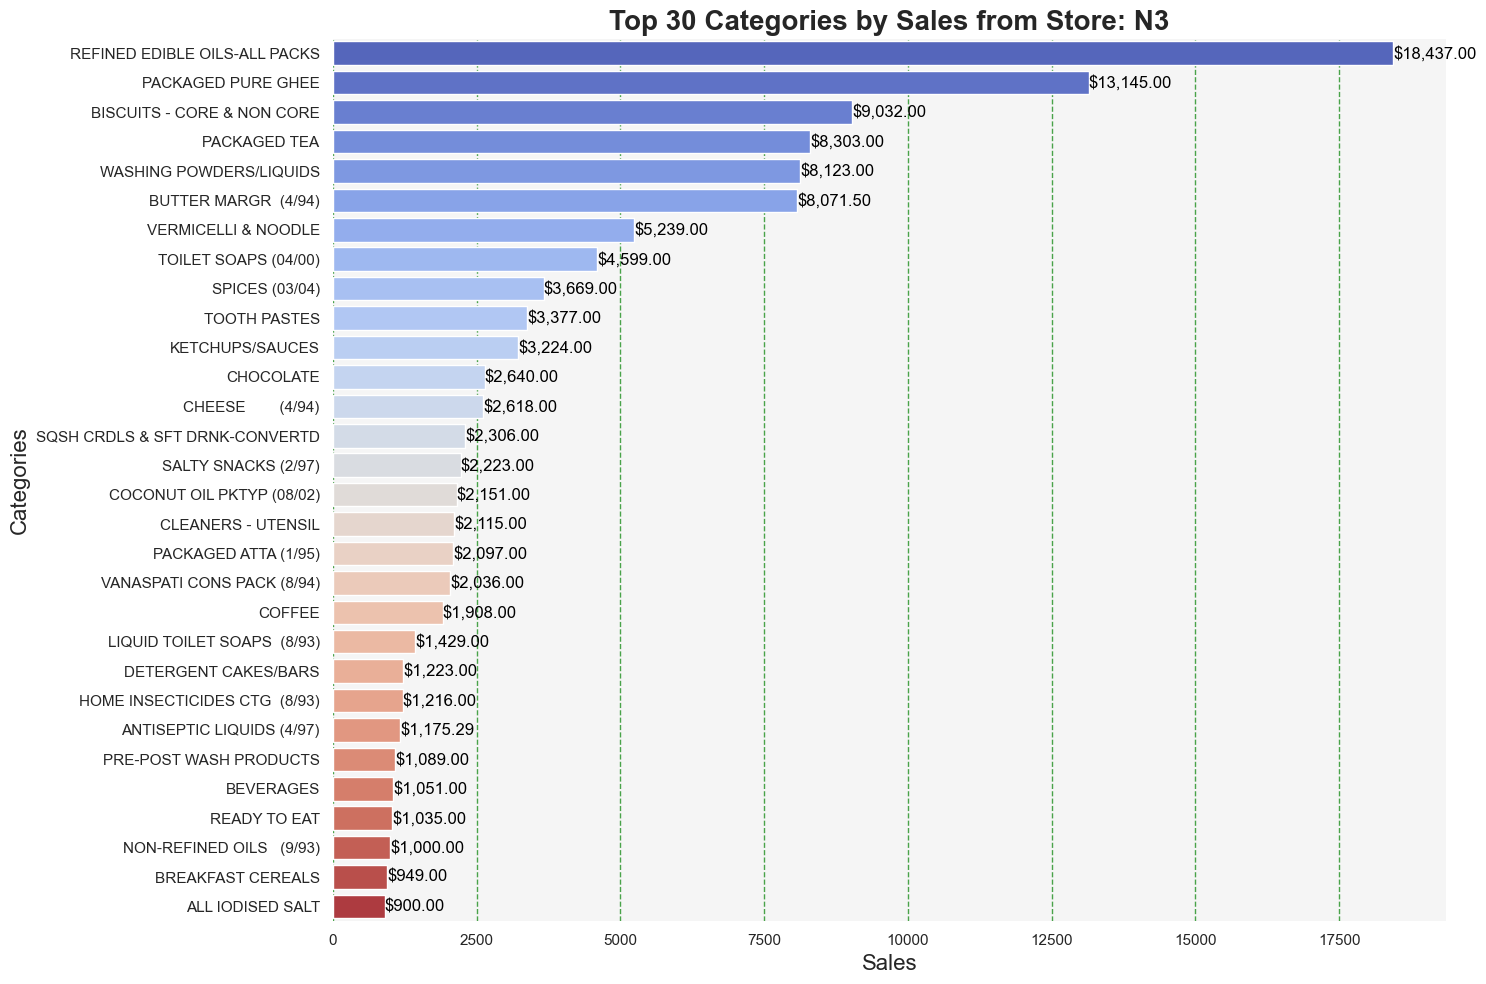

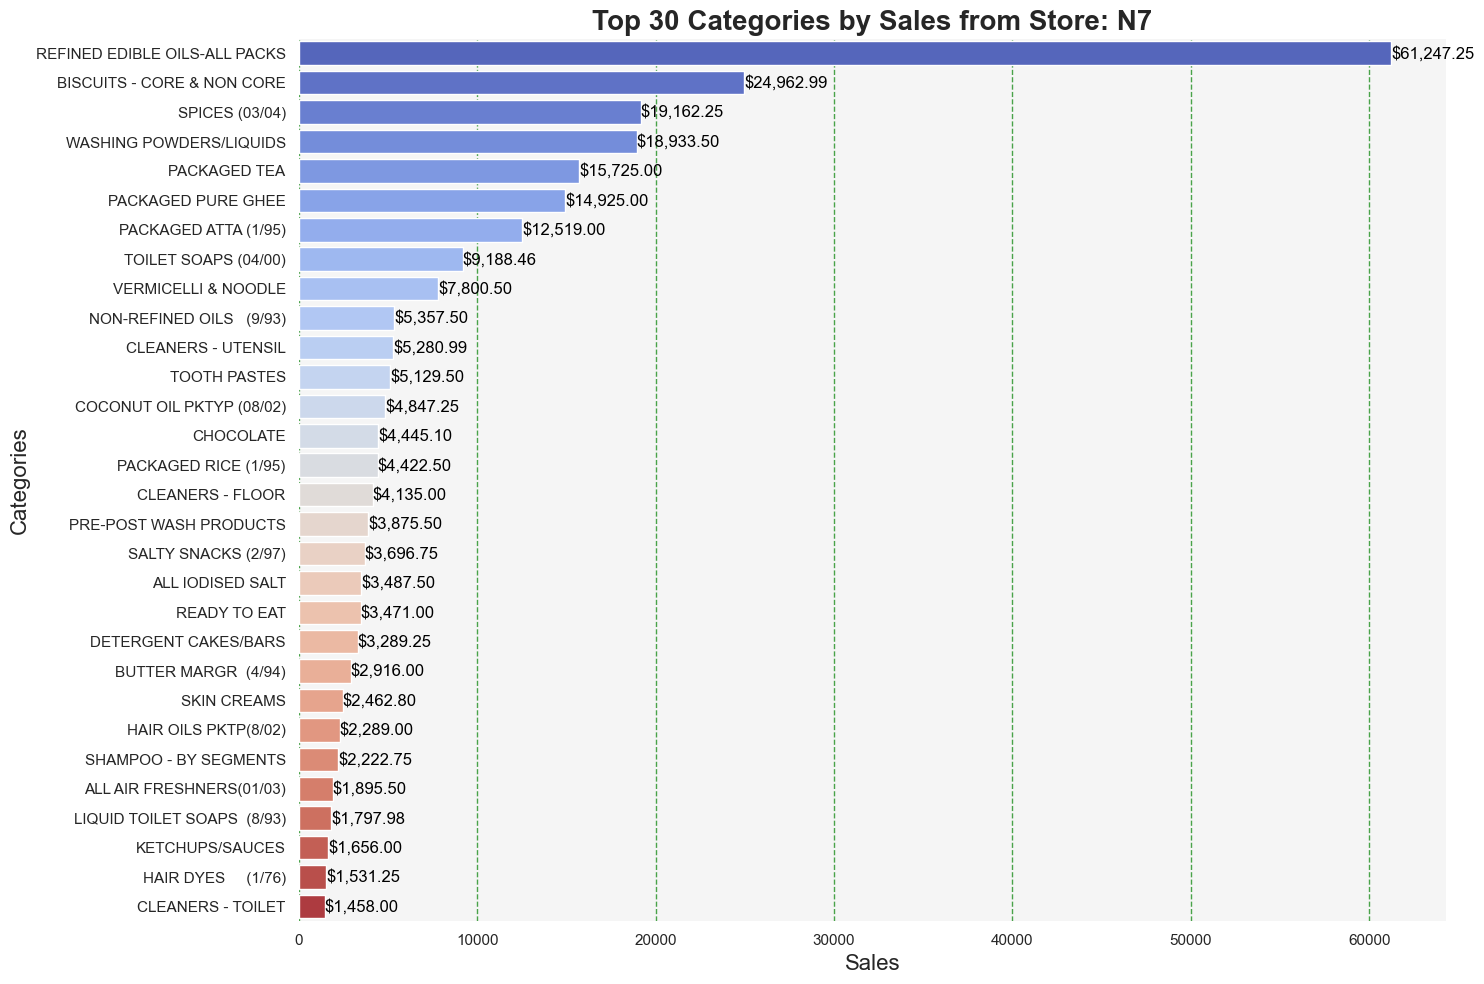

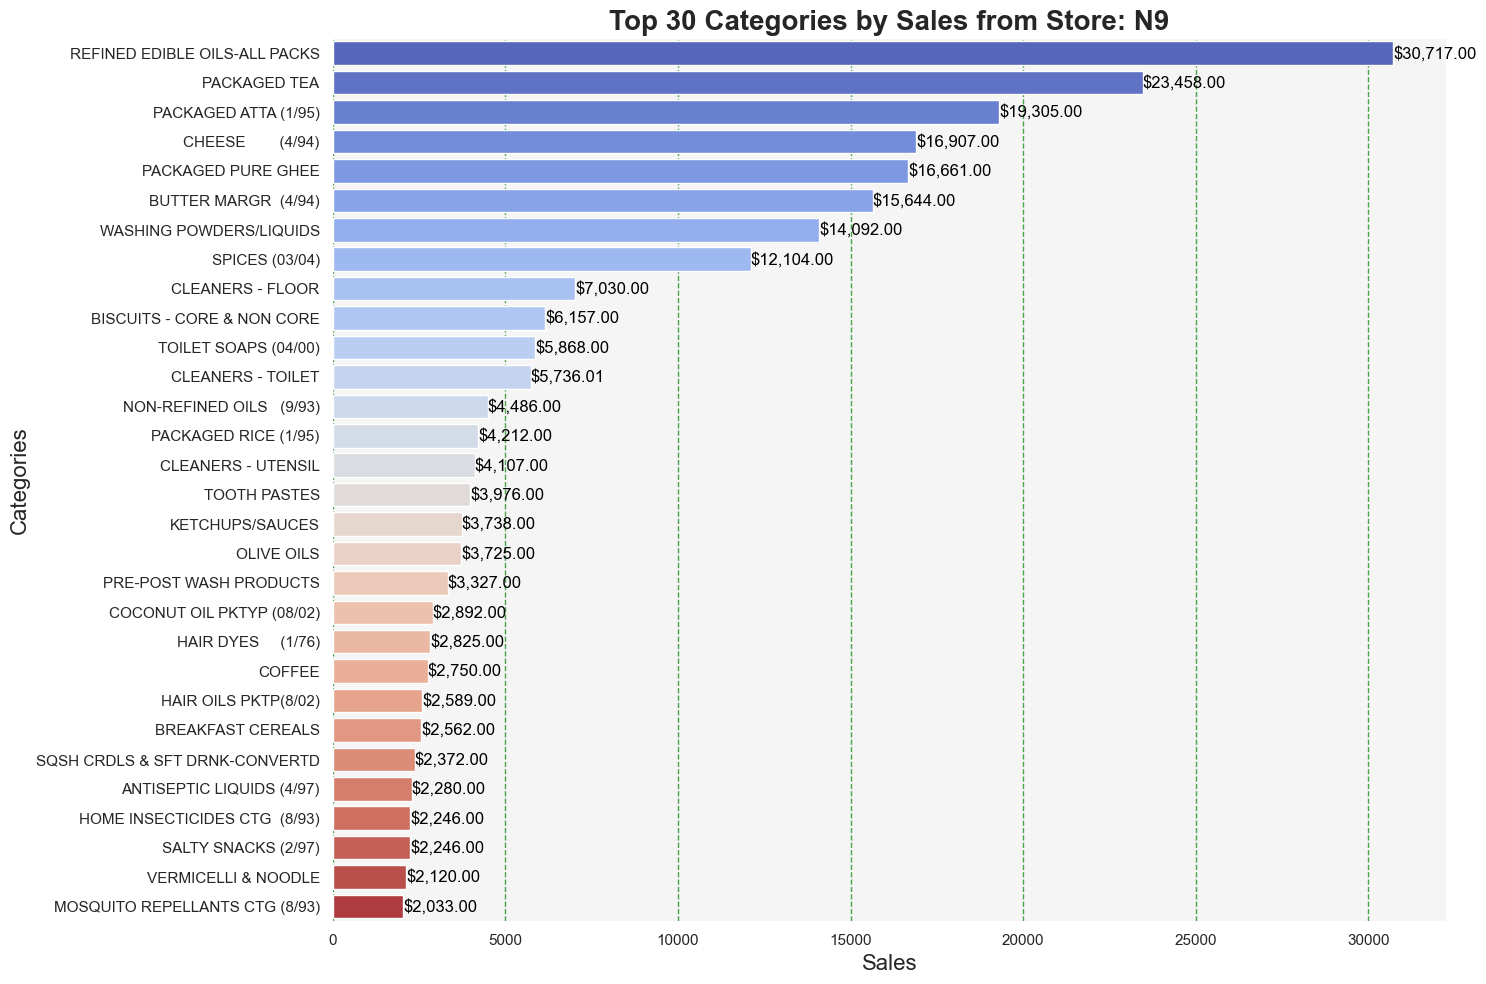

In [42]:
#
for i in data.STORECODE.unique():
    
    x = data.loc[data.STORECODE == i].groupby("GRP").sum().sort_values("VALUE", ascending=False)[["VALUE", "QTY"]][0:30]
    plt.figure(figsize=(15, 10))
    color_palette = sns.color_palette("coolwarm", len(x))
    bars = sns.barplot(x='VALUE', y=x.index, data=x, palette=color_palette)
    plt.title("Top 30 Categories by Sales from Store: " + i, fontsize=20, fontweight='bold')
    plt.ylabel("Categories", fontsize=16)
    plt.xlabel("Sales", fontsize=16)
    plt.grid(axis='x', color='green', linestyle='--', alpha=0.7)
    for index, value in enumerate(x['VALUE']):
        bars.text(value, index, f'${value:,.2f}', color='black', ha="left", va="center", fontsize=12)
    plt.gca().set_facecolor('whitesmoke')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

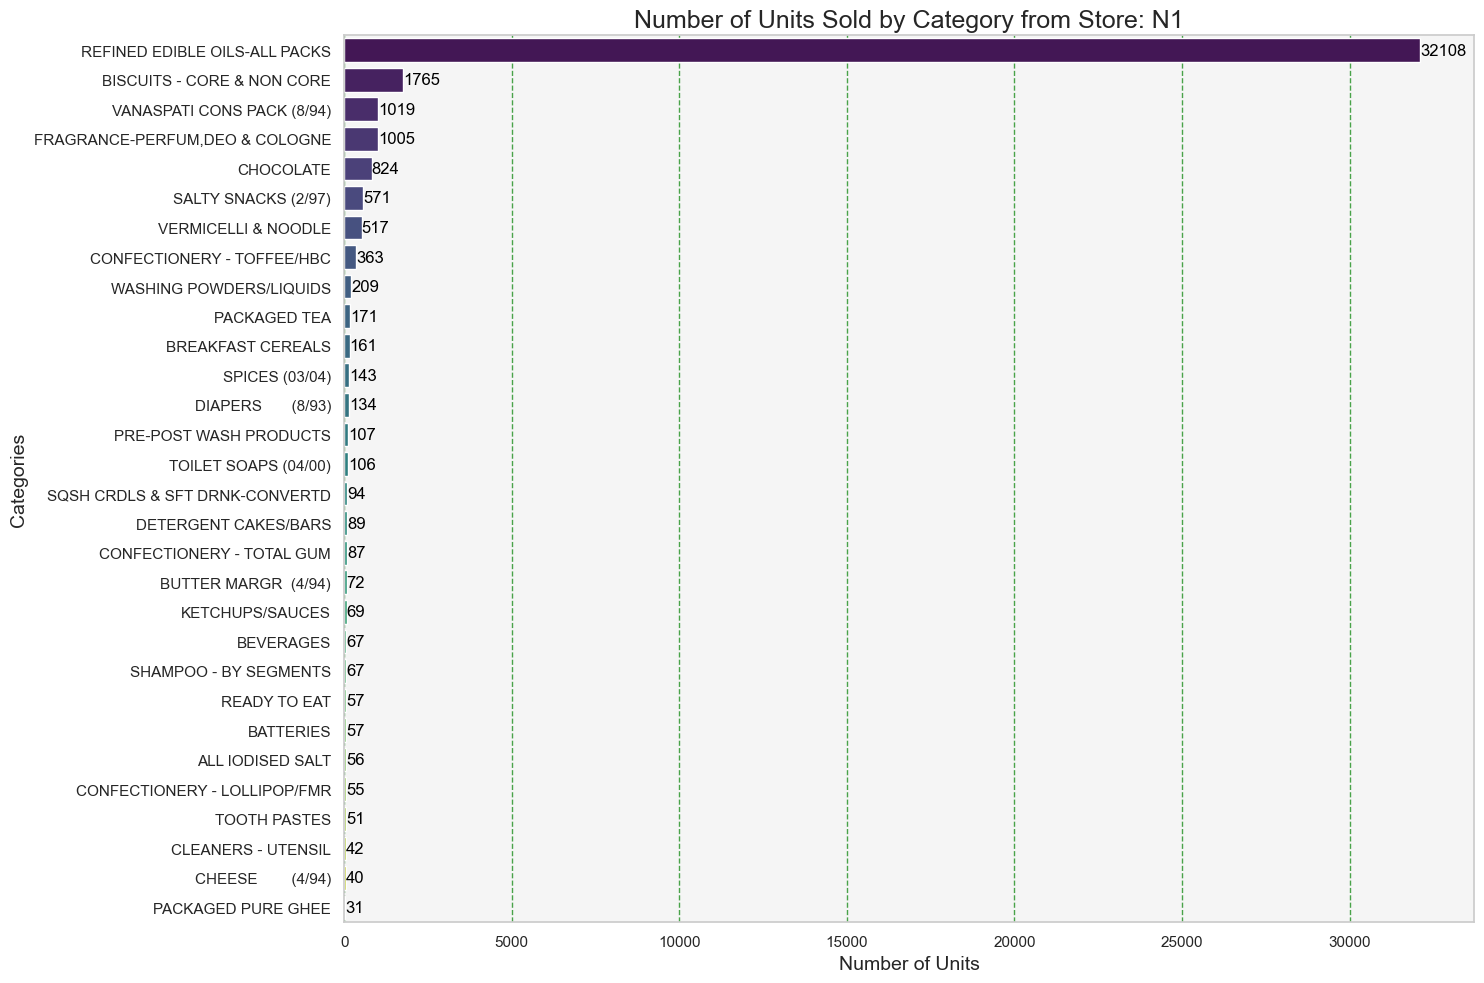

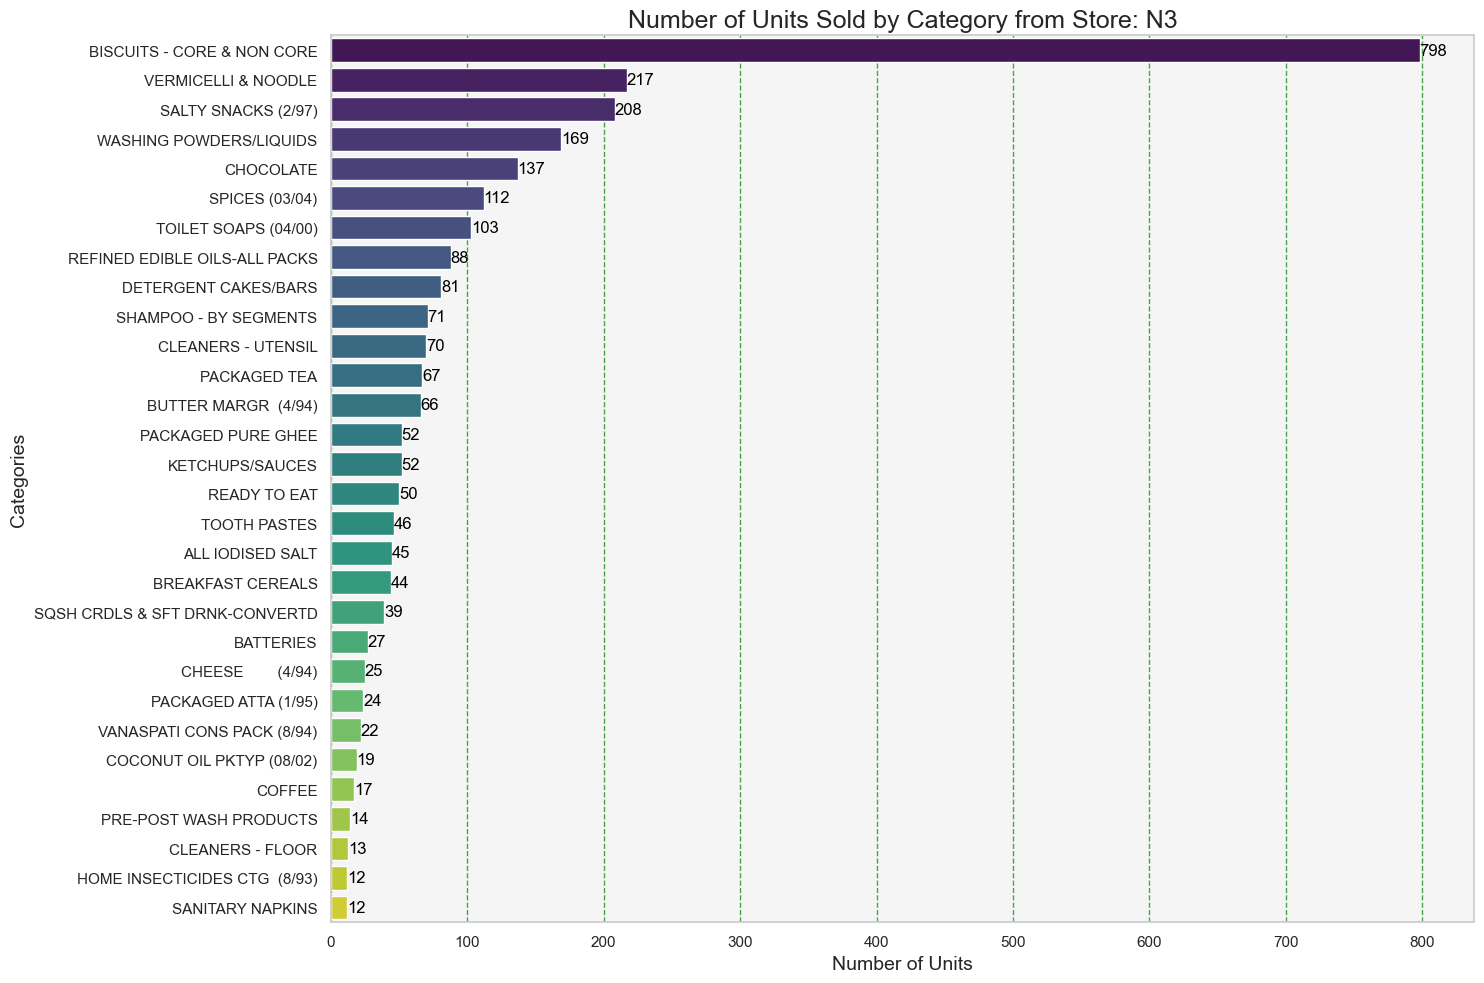

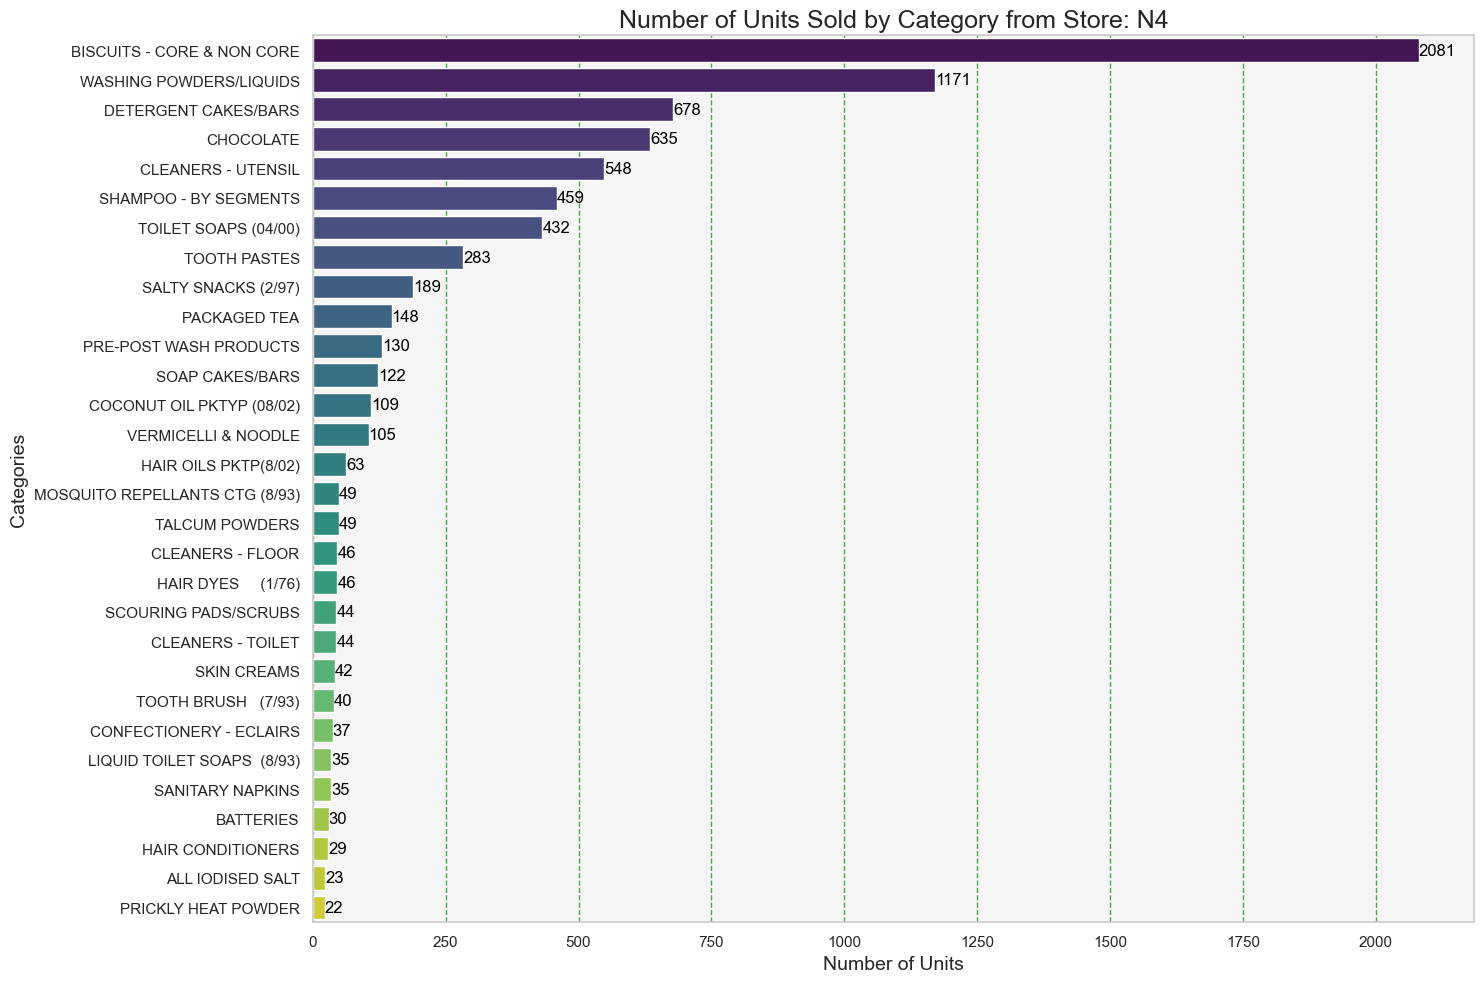

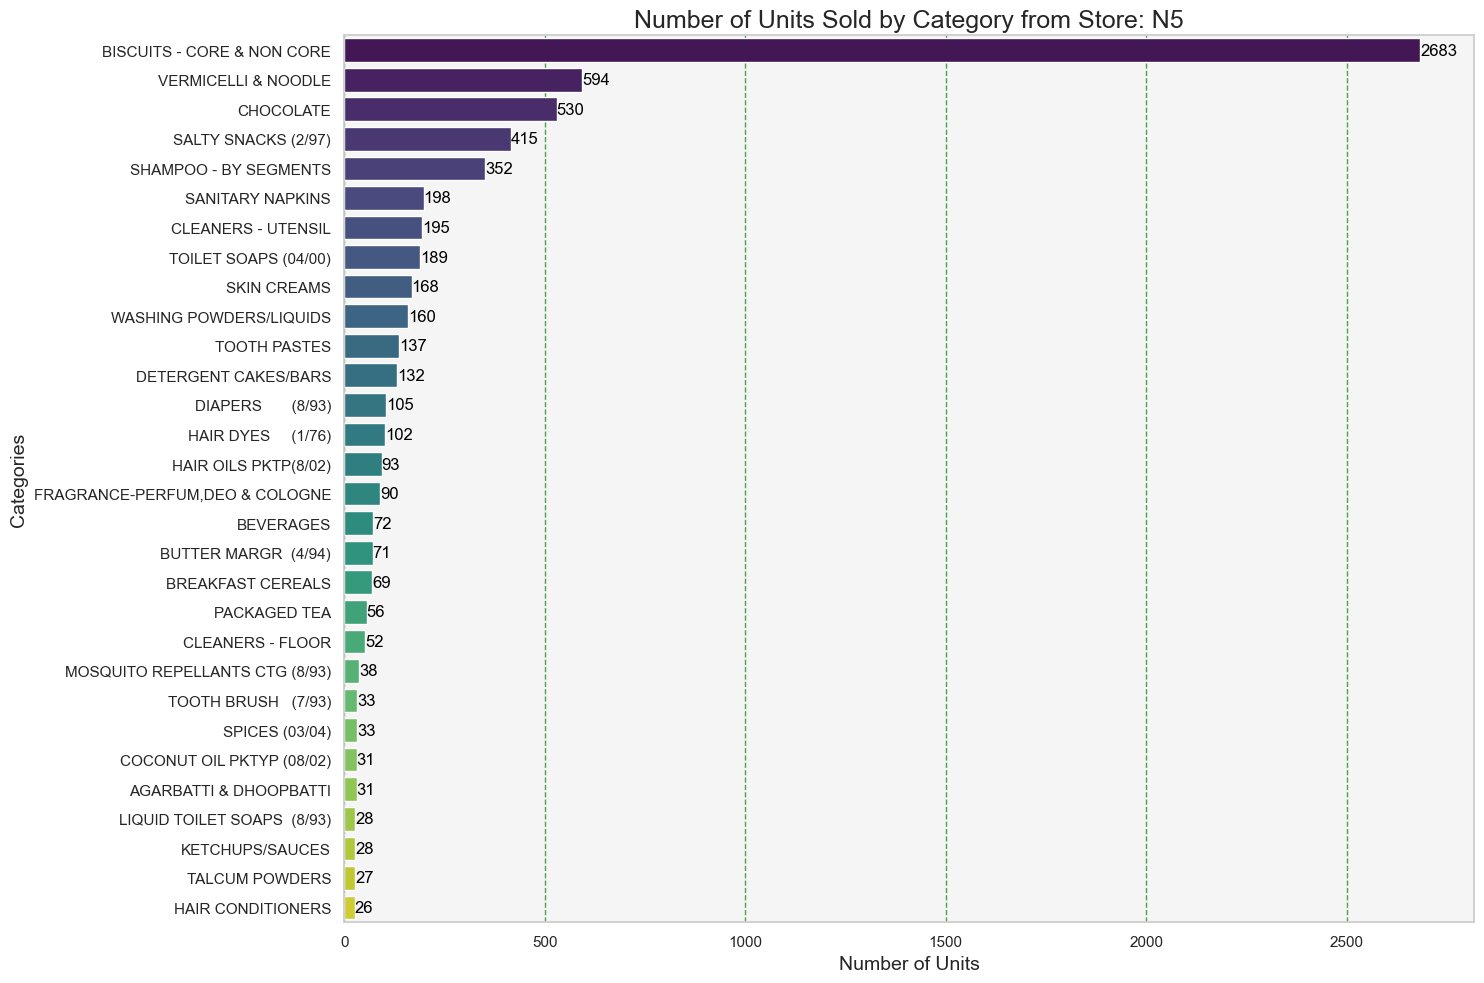

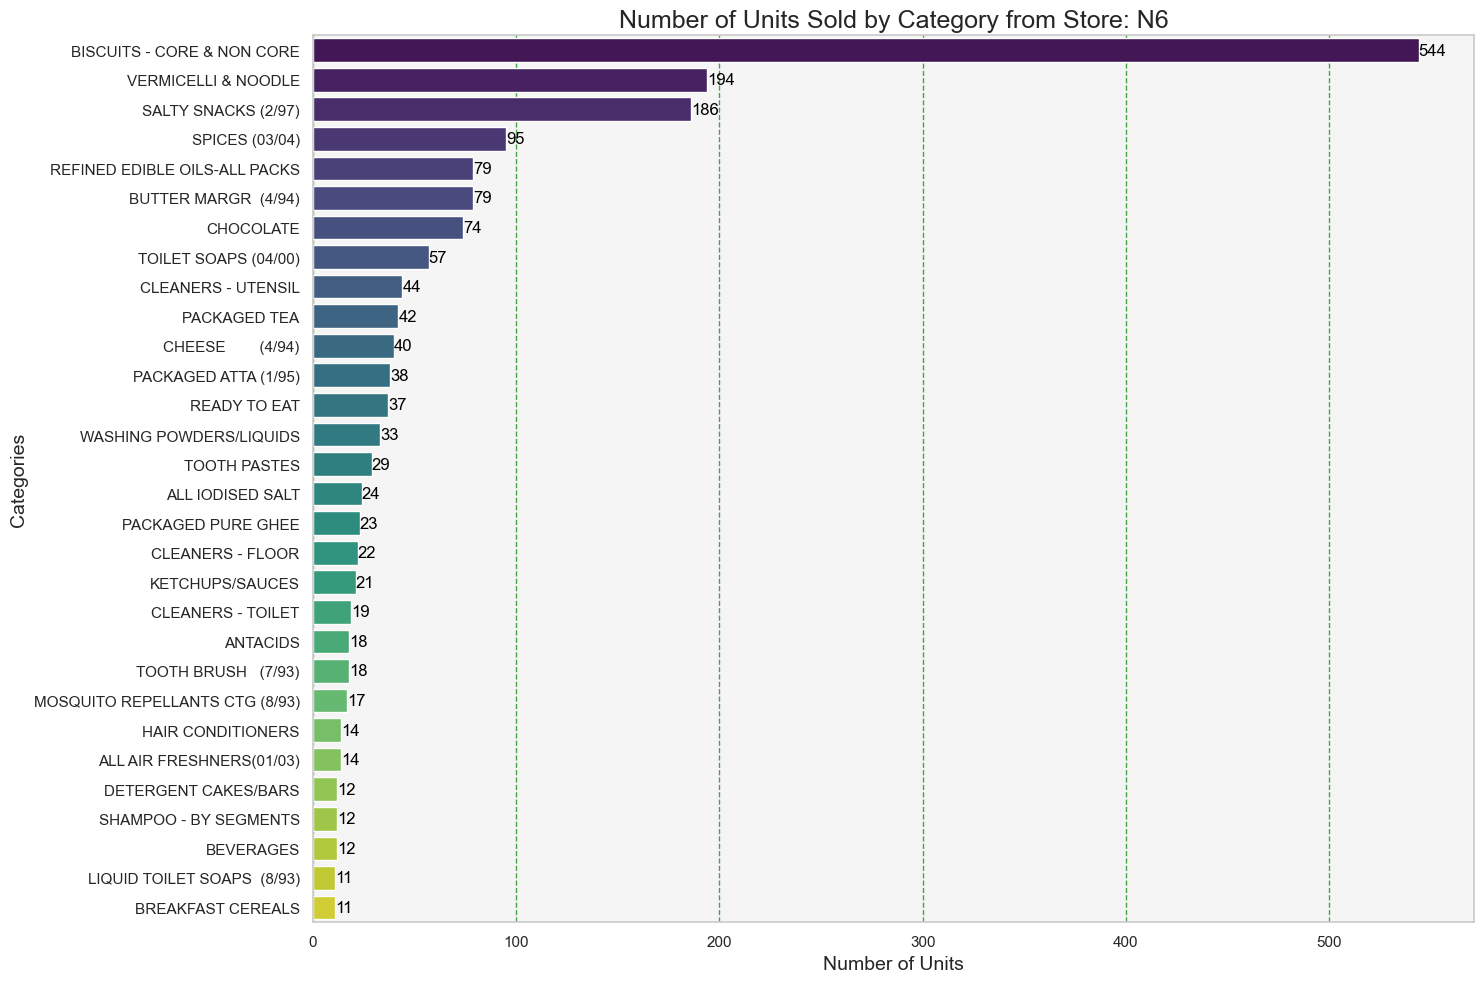

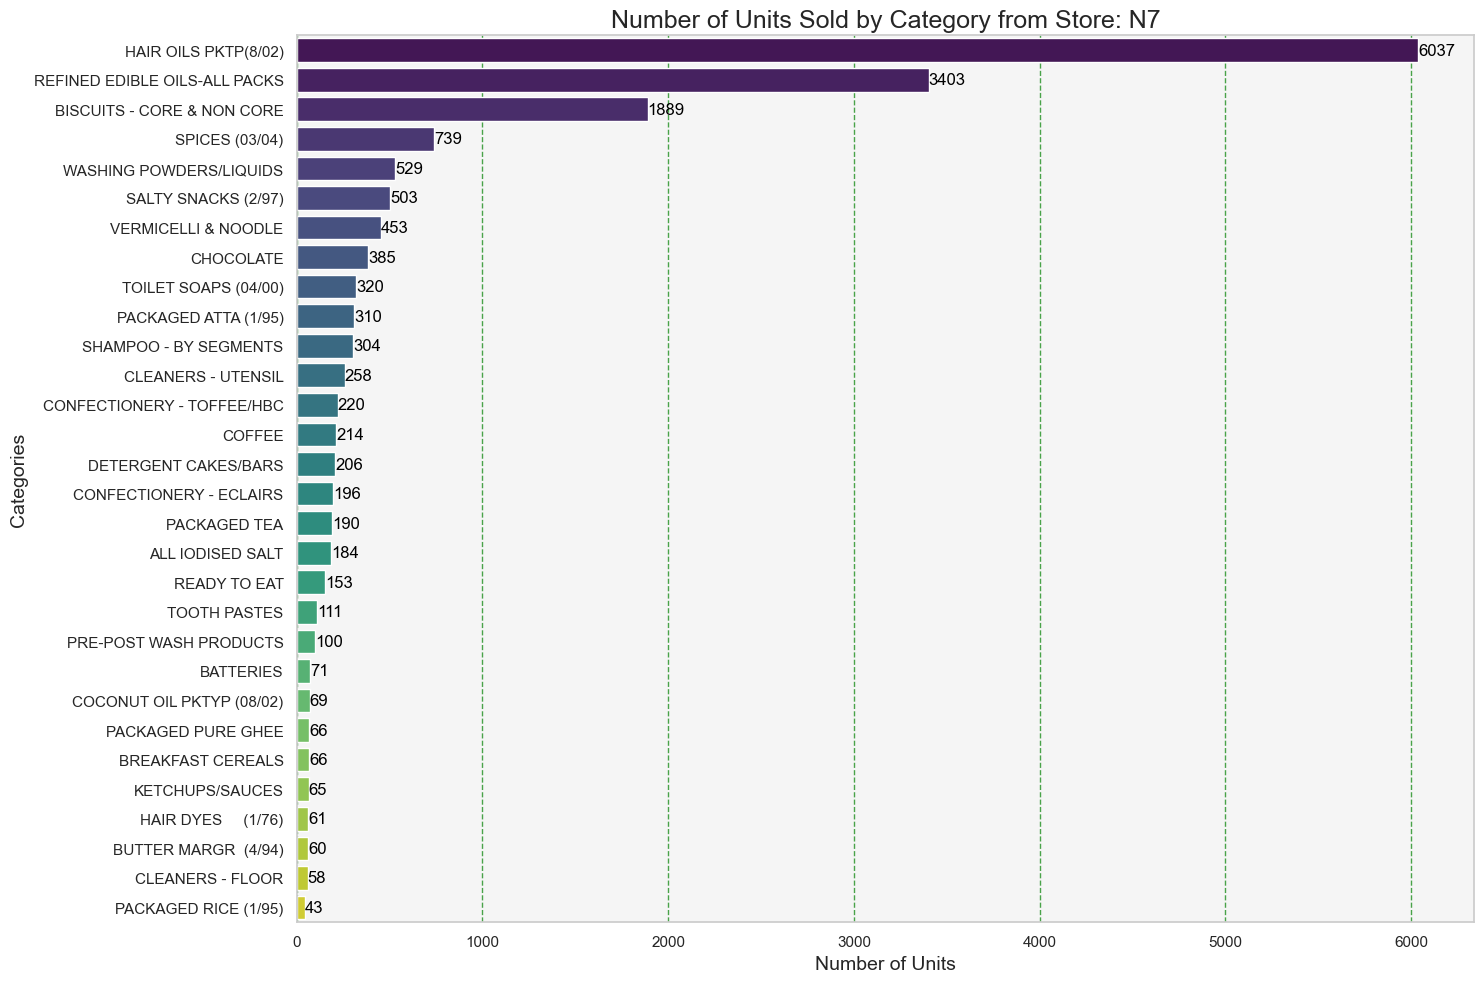

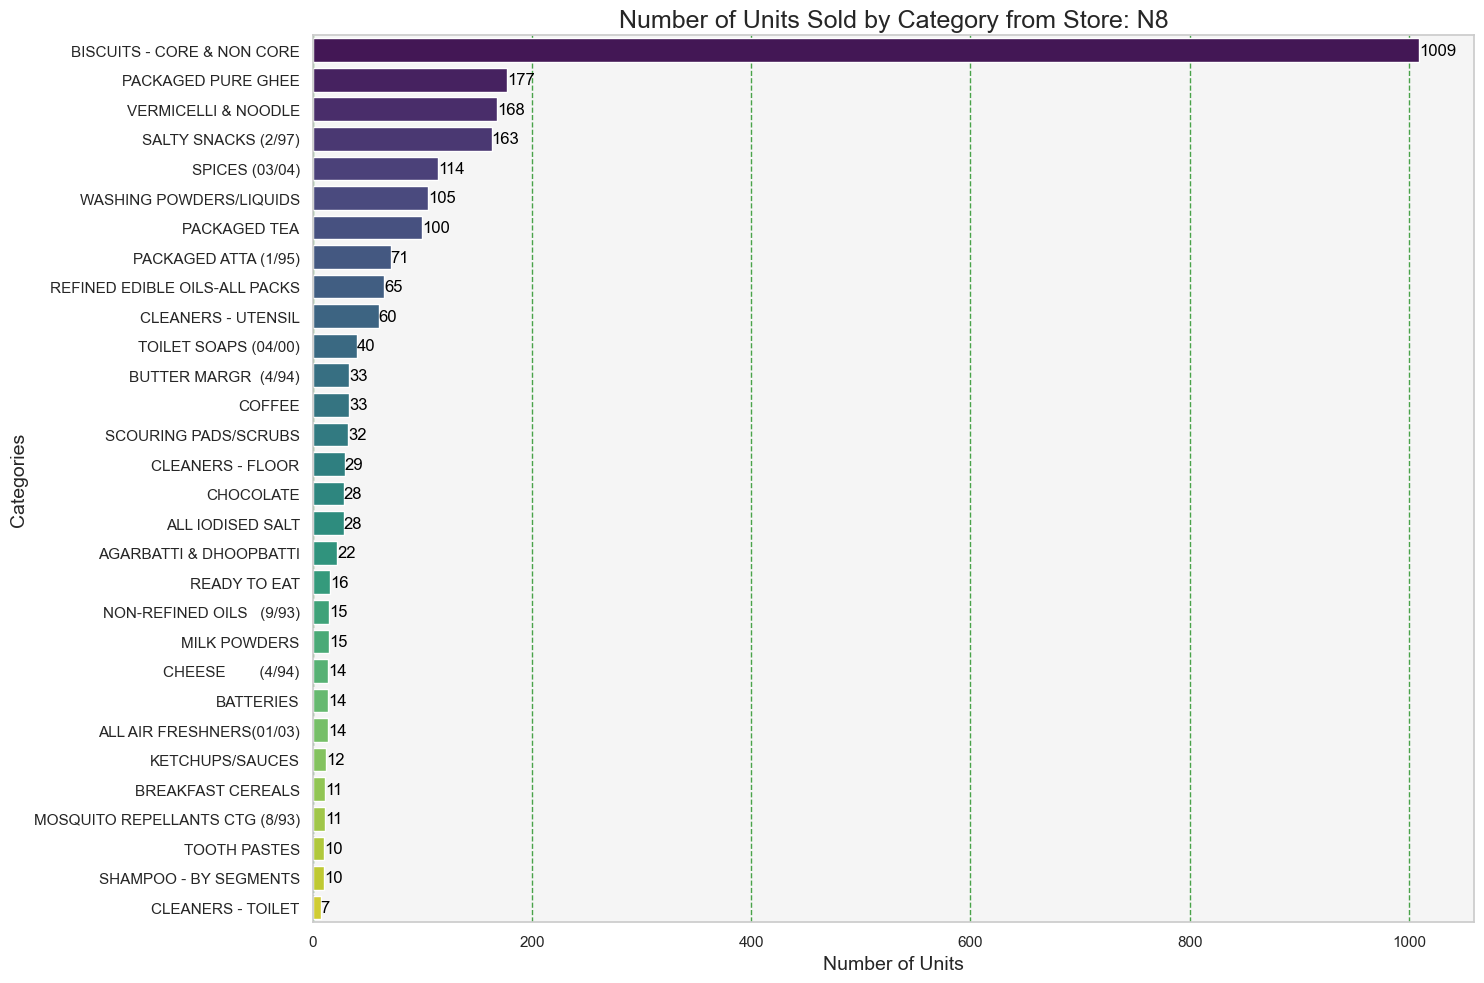

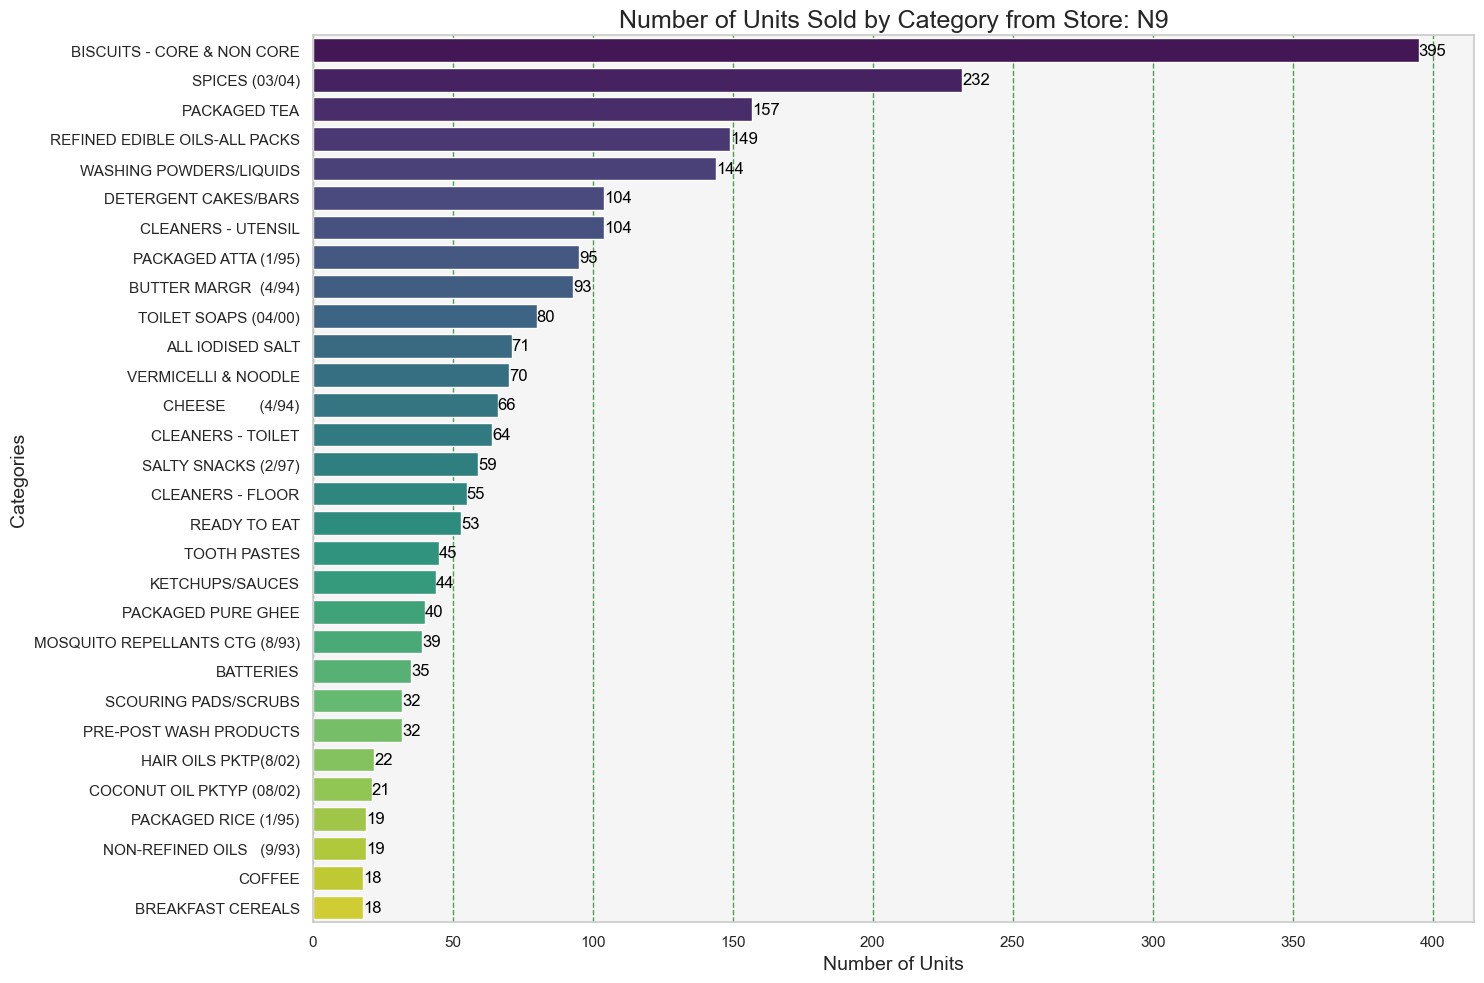

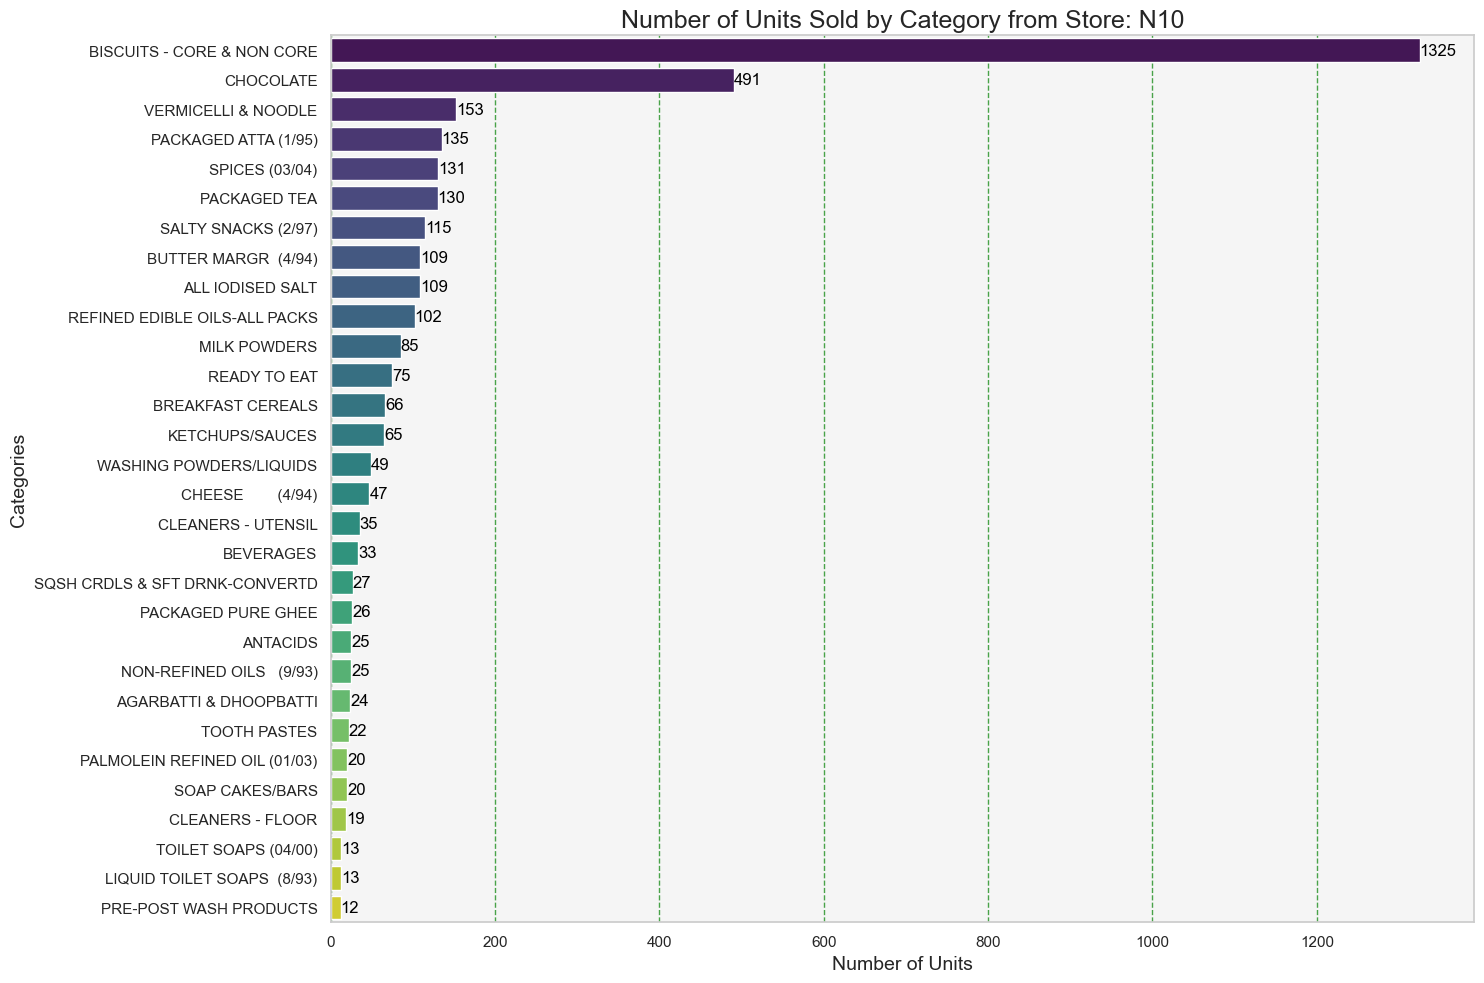

In [41]:


for i in data.STORECODE.unique():
    
    x = data.loc[data.STORECODE == i].groupby("GRP").sum().sort_values("QTY", ascending=False)[["VALUE", "QTY"]][0:30]
    plt.figure(figsize=(15, 10))
    color_palette = sns.color_palette("viridis", len(x))
    bars = sns.barplot(x='QTY', y=x.index, data=x, palette=color_palette)
    plt.title("Number of Units Sold by Category from Store: " + i, fontsize=18)
    plt.xlabel("Number of Units", fontsize=14)
    plt.ylabel("Categories", fontsize=14)
    plt.grid(axis='x', color='green', linestyle='--', alpha=0.7)
    
    for index, value in enumerate(x['QTY']):
        bars.text(value, index, f'{value:.0f}', color='black', ha="left", va="center", fontsize=12)
    plt.gca().set_facecolor('whitesmoke')
    plt.tight_layout()
    plt.show()
    






# Analysis By Price


In [39]:
# Plot histograms for numerical columns


sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Columns', fontsize=16)
numerical_columns = ['BILL_AMT', 'QTY', 'VALUE', 'PRICE']
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=50, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




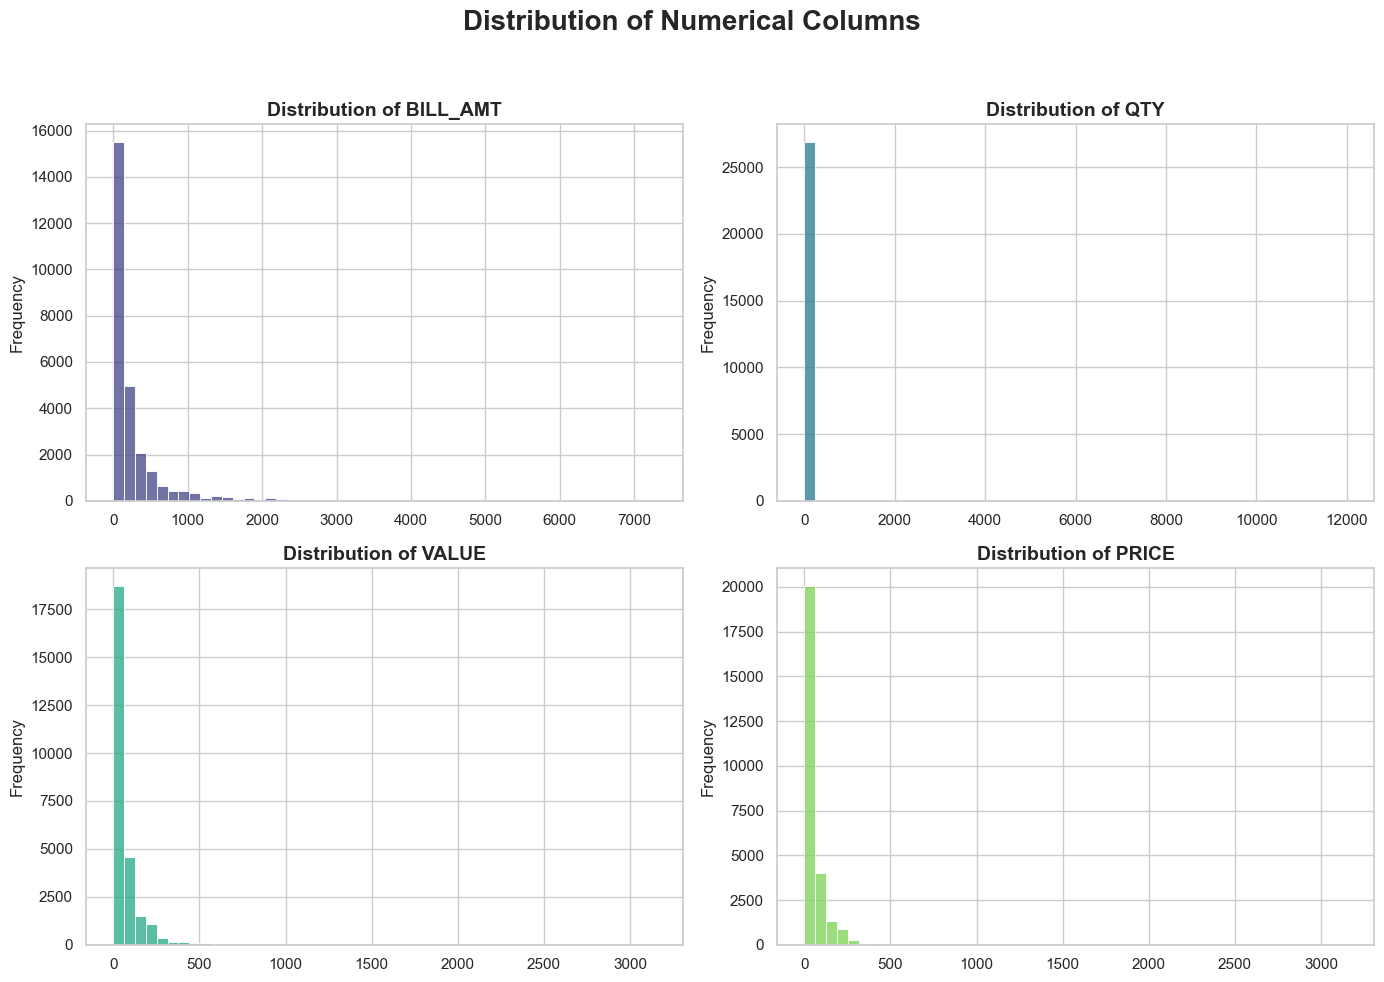

In [44]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Columns', fontsize=20, fontweight='bold')
numerical_columns = ['BILL_AMT', 'QTY', 'VALUE', 'PRICE']
color_palette = sns.color_palette("viridis", len(numerical_columns))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=50, ax=axes[i//2, i%2], color=color_palette[i])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

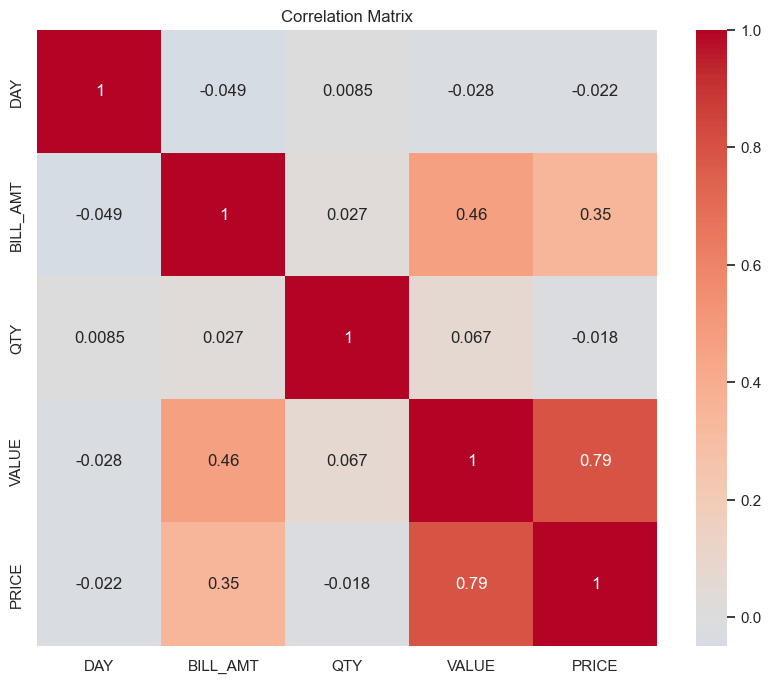

In [40]:

numeric_columns = ['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE']
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [63]:
# Top-Selling Products by Quantity


top_selling_qty = data.groupby('BRD')['QTY'].sum().sort_values(ascending=False).head(10)
top_selling_qty.plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Products by Quantity')
plt.show()

In [64]:
# Top-Selling Products by Value


top_selling_value = data.groupby('BRD')['VALUE'].sum().sort_values(ascending=False).head(10)
top_selling_value.plot(kind='bar', figsize=(12, 6), title='Top 10 Selling Products by Value')
plt.show()

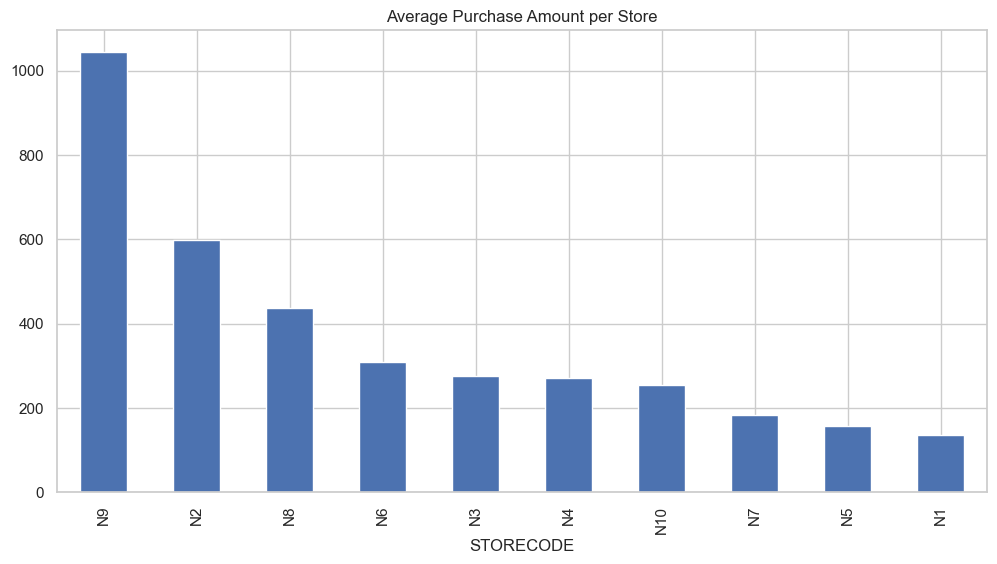

In [66]:
# Purchasing Patterns: Average purchase amount per store

average_purchase_amt = data.groupby('STORECODE')['BILL_AMT'].mean().sort_values(ascending=False)
average_purchase_amt.plot(kind='bar', figsize=(12, 6), title='Average Purchase Amount per Store')
plt.show()

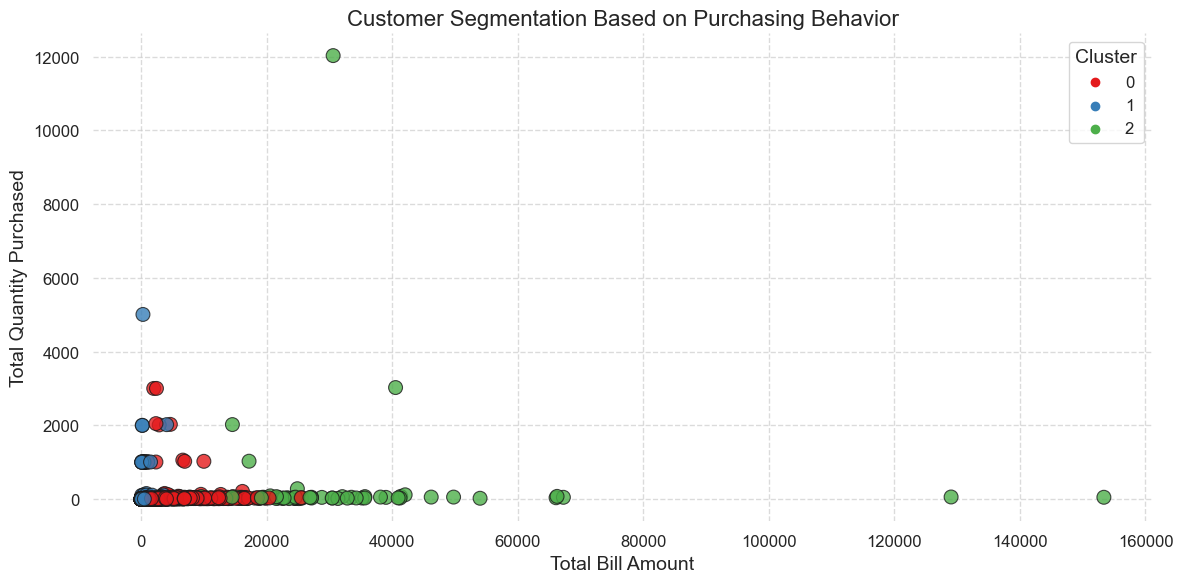

In [68]:
# Customer Segmentation


customer_data = data.groupby('BILL_ID').agg({'BILL_AMT': 'sum', 'QTY': 'sum', 'VALUE': 'sum', 'PRICE': 'mean'}).reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['BILL_AMT', 'QTY', 'VALUE', 'PRICE']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


sns.set(style="whitegrid")
sns.scatterplot(x='BILL_AMT', y='QTY', hue='Cluster', data=customer_data, palette='Set1', s=100, alpha=0.8, edgecolor='k')
plt.title('Customer Segmentation Based on Purchasing Behavior', fontsize=16)
plt.xlabel('Total Bill Amount', fontsize=14)
plt.ylabel('Total Quantity Purchased', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [69]:
# Customer Segmentation
customer_data = data.groupby('BILL_ID').agg({'BILL_AMT': 'sum', 'QTY': 'sum', 'VALUE': 'sum', 'PRICE': 'mean'}).reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['BILL_AMT', 'QTY', 'VALUE', 'PRICE']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Count the number of customers in each cluster
cluster_counts = customer_data['Cluster'].value_counts()

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a pie chart for customer segmentation
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1', len(cluster_counts)))
plt.title('Customer Segmentation Based on Purchasing Behavior', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()